# Project: Investigate Gapminder Data
**By: Oluwafemi Adejumobi**

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project will look into the Gapminder datasets. To be more specific, it will examine the life expectancy of populations in  countries, as well as the effects of other variables. It will also examine the evolution of these variables, with the goal of identifying trends that are linked to a longer life expectancy and income per person.

**What is Gapminder?** "Gapminder is a non-profit organization based in Sweden with no political, religious, or economic ties. Gapminder is a fact-checking organization, not a think tank. Gapminder is a non-profit organization that tackles harmful myths about global development."  (https://www.gapminder.org/about-gapminder/)

> *All the used data in this analysis was downloaded on the 05.06.2022.*

>**Name:** Population total</li>
<ul>   
    <li><b>Definition</b>: Total population</li>
    <li><b>Source:</b> <a href="http://gapm.io/dpop">http://gapm.io/dpop</a></li>    
    <li><b>Version</b>: 6</li>
</ul>

> **Name:** Life expectancy (years)</li>
<ul>   
    <li><b>Definition</b>: The average number of years a newborn child would live if current mortality patterns were to stay the same.</li>
    <li><b>Source:</b> <a href="http://gapm.io/ilex">http://gapm.io/ilex</a></li>     
    <li><b>Version</b>: 12</li>
</ul>

> **Name:** Income per person (GPD/Capita, PPP$ inflation-adjusted)
<ul>   
    <li><b>Definition</b>: Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).</li>
    <li><b>Source:</b> <a href = http://gapm.io/dgdppc>http://gapm.io/dgdppc</a></li>    
    <li><b>Version</b>: 27</li>
</ul>

### Question(s) for Analysis
The following analysis will take a look on the following questions:
><ol>
>    <li><p>What happened to the world's population over time?</p></li>     
>    <li><p>How have life expectancy and per capita income evolved over time?</p></li>     
>    <li><p>Is there a relationship between income and life expectancy?</p></li> 
></ol>

#### Before we proceed to data wrangling, we need to install some important modules that are not ready available to
- plot missing data
- show country codes to country names
- convert the country code to the corresponding continent

In [2]:
# plot missing data
!pip install missingno

In [7]:
# show country codes to country names
!pip install pycountry

In [8]:
# convert the country code to the corresponding continent
!pip install pycountry_convert

In [1]:
import numpy as np #create arrays
import pandas as pd #handle and wrangle data
import matplotlib.pyplot as plt #plot data
import seaborn as sns #plot data
import missingno as ms #plot missing data

from functools import reduce #merge multiple dataframes together

import pycountry #show country codes to country names
import pycountry_convert #convert the country code to the corresponding continent

#show plots inside this notebook
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' #get better plot quality


In [4]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
#read in all the necessary *.csv
population = pd.read_csv("population_total.csv")
life_expectancy = pd.read_csv("life_expectancy_years.csv")
income_per_person = pd.read_csv("income_per_person_with_projections.csv")

In [3]:
population.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [4]:
life_expectancy.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [5]:
income_per_person.head()

,country,1764,1765,1766,1767,1768,1769,1770,1771,1772,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.4k,21.9k,23.7k,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1160,1220,1260,1350,1350,1370,1420,1460,1500,1530
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5480,5500,5550,5840,6020,6270,6510,6740,6730,6930
3,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.3k,18.2k,18.6k,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6550,6750,6910,6970,7060,7200,7340,7490,7640,7790


From above we can see that both population and life expectancy ends at 2100 while income_per_person ends at 2018.
Therefore, for data consistency, we shall reduce population and life expectancy years to 2018 before we proceed.

In [6]:
#reduce the data year to 2018 since the 2018 seem regular for the other data
population = population.loc[:,'country':'2018']

In [7]:
#reduce the data year to 2018
life_expectancy = life_expectancy.loc[:,'country':'2018']

>Let's take a look on the overall data shape, starting with the population data. But the data isn't organized well enough to allow for accurate visualizations and calculations. The next step will solve this problem by melting the dataframe into individual rows for each year. In addition, the dataframe will be sorted by country name and year.

In [8]:
#melt the dataframe to get tidy data, and unpivot the columns
population_melt = pd.melt(population, id_vars=["country"], var_name="year", value_name= "population")

#sort values by country and year
population_melt.sort_values(["country", "year"], inplace = True)

#show the head of the dataframe
population_melt.head()

,country,year,population
0,Afghanistan,1800,3.28M
197,Afghanistan,1801,3.28M
394,Afghanistan,1802,3.28M
591,Afghanistan,1803,3.28M
788,Afghanistan,1804,3.28M


In [9]:
population_melt.shape

(43143, 3)

In [10]:
#melt the dataframe to get tidy data
life_expectancy_melt = pd.melt(life_expectancy, id_vars = ["country"], var_name = 'year', value_name = 'life_expectancy')

#sort values by country and year
life_expectancy_melt.sort_values(["country", "year"], inplace = True)

#show the head of the dataframe
life_expectancy_melt.head()

,country,year,life_expectancy
0,Afghanistan,1800,28.2
195,Afghanistan,1801,28.2
390,Afghanistan,1802,28.2
585,Afghanistan,1803,28.2
780,Afghanistan,1804,28.2


In [11]:
life_expectancy_melt.shape

(42705, 3)

>Although it is sometimes preferable to have each metric in its own dataframe, we need to establish a dataframe containing many metrics for this analysis because we are looking for correlations between the data. As a result, we must combine the melted dataframes into one. The population size will be used as the "starting dataframe" for the merging process because it will be considered in most parts of the analysis.

In [12]:
#merge the two dataframes together on country and year
df_all = pd.merge(population_melt, life_expectancy_melt, on =["country", "year"], how ='left')

In [13]:
#show the head of the dataframe
df_all.head()

,country,year,population,life_expectancy
0,Afghanistan,1800,3.28M,28.2
1,Afghanistan,1801,3.28M,28.2
2,Afghanistan,1802,3.28M,28.2
3,Afghanistan,1803,3.28M,28.2
4,Afghanistan,1804,3.28M,28.2


>The dataframe was successfully melted and merged, resulting in a dataframe with two metrics. While the population has 43143 rows, the life expectancy has only 42705, indicating that there is already some missing data that we will have to deal with later. Using the package "missingno" to show missing data is a good and quick approach to do it.

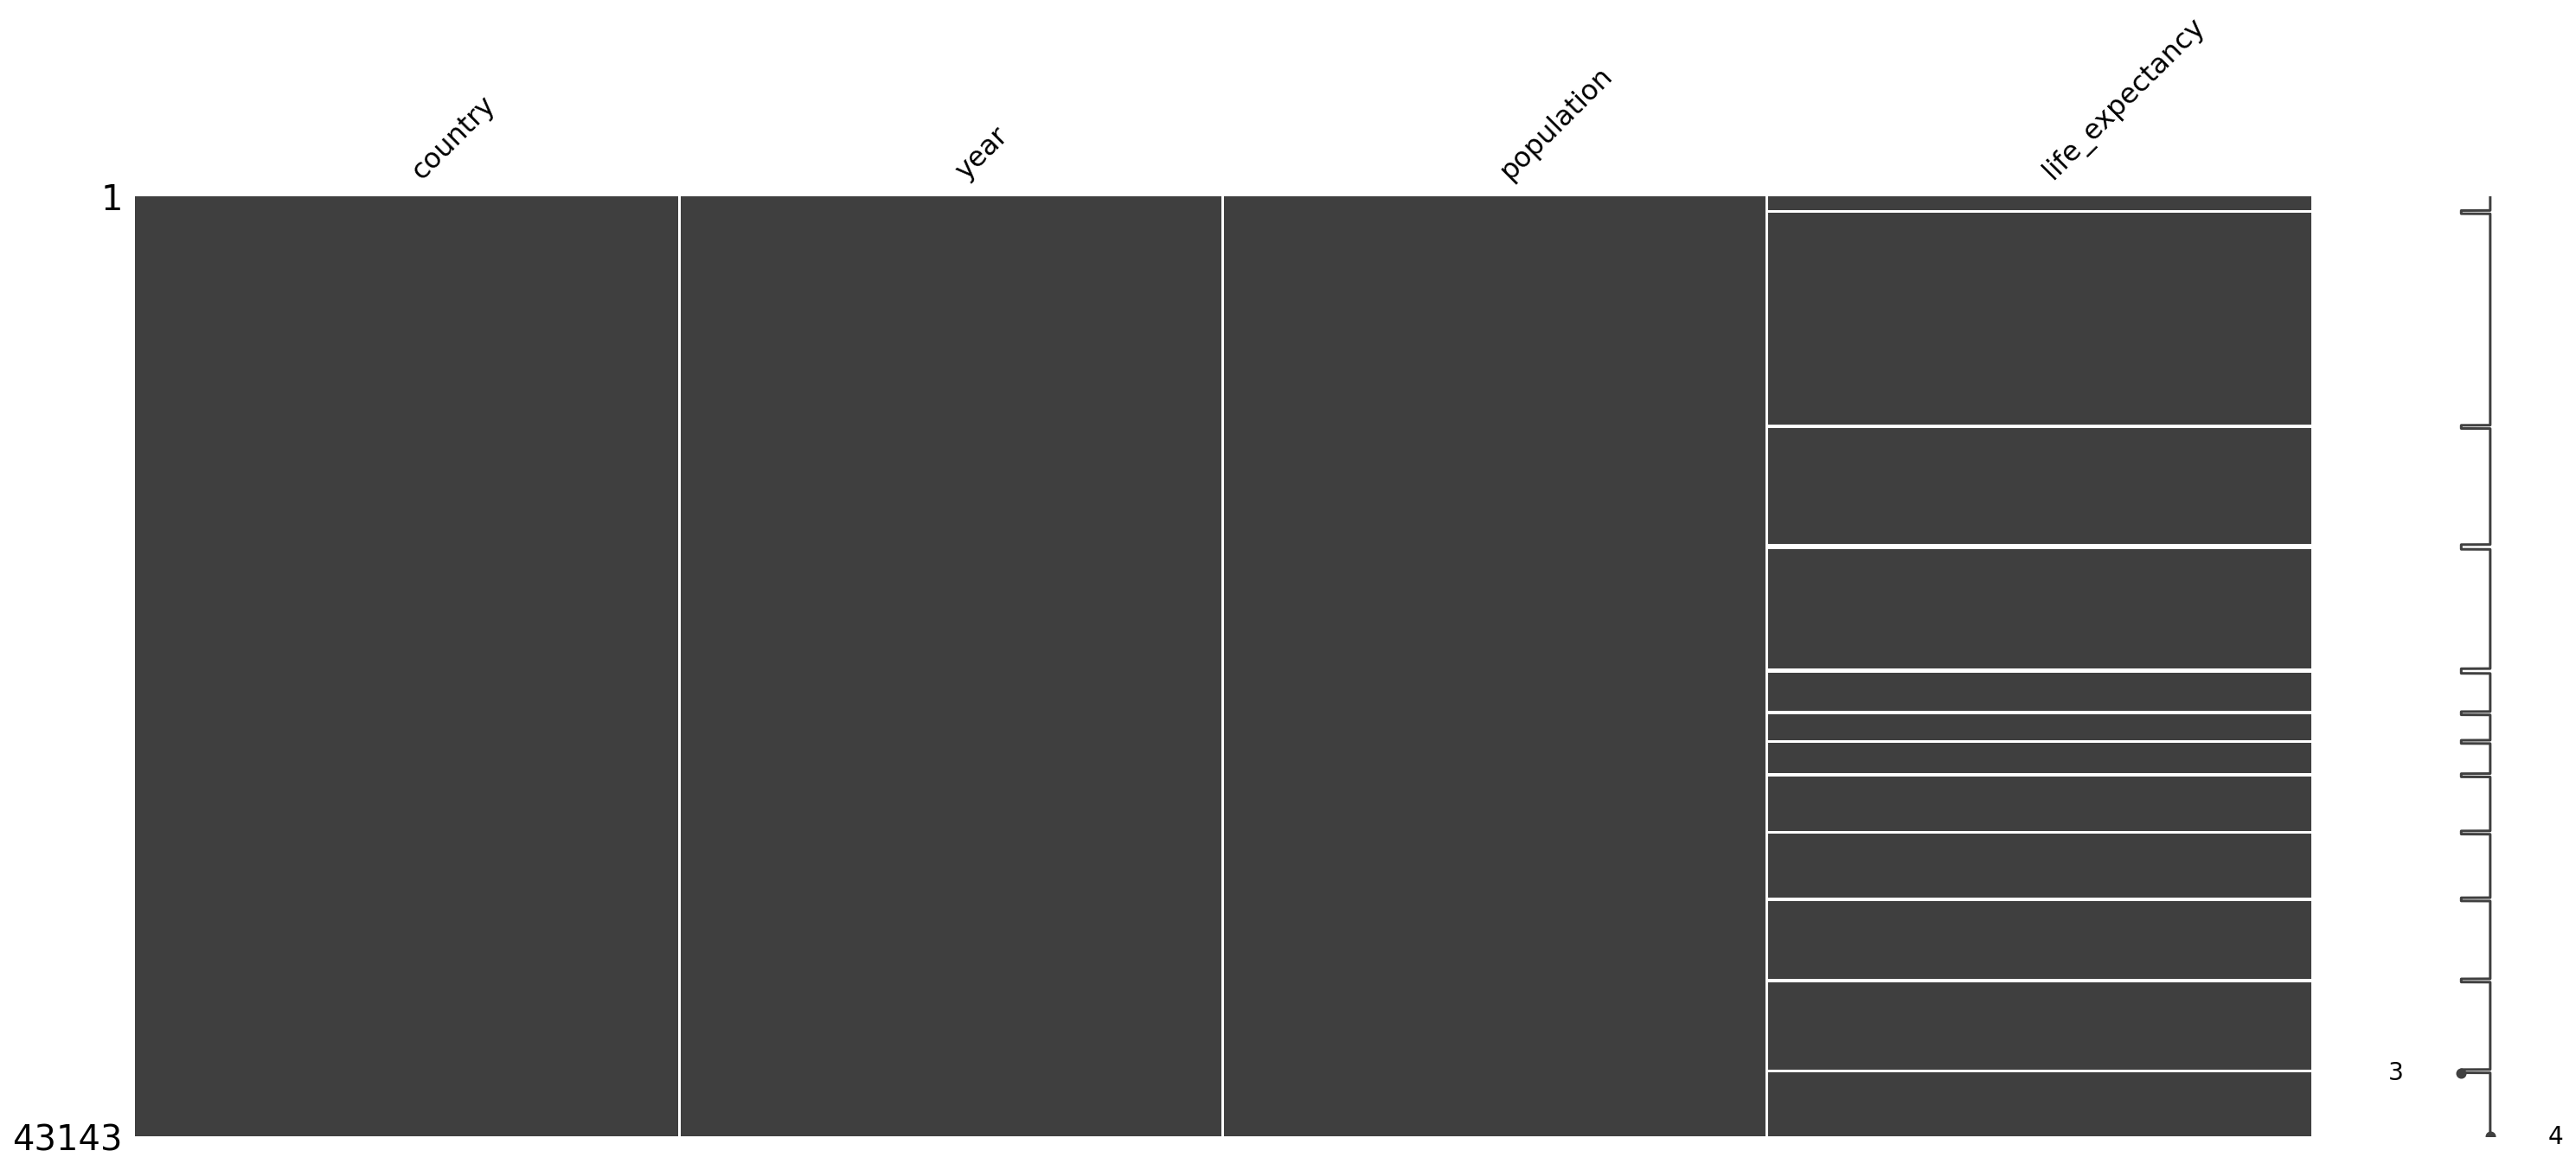

In [14]:
#plot the missing data of the dataset
ms.matrix(df_all);

>It appears that the missing rows are always multiple rows adjacent to one another, implying that specific countries are missing. Before continuing with the missing data, we'll develop a function to merge the gapminder data into a single dataframe, which we'll accomplish in the next cell.

In [15]:
def df_melt(df, valname):
    """
    INPUT: 
        df: list of dataframes,
        valname: valuename as string which will later be column name

    OUTPUT:
        melted dataframes (by country and year)
    """
    #create list
    func_df = []
    
    #loop over list of df 
    for i, x in enumerate(df):
        df_melt = pd.melt(df[i], id_vars = ["country"], var_name = 'year', value_name = valname[i])
        df_melt.sort_values(["country", "year"], inplace = True)
        
        #append to created list
        func_df.append(df_melt)
    return func_df

In [16]:
dataframes = [population, life_expectancy]
value_names = ["population", "life_expectancy"]

func_df = df_melt(dataframes, value_names)

In [17]:
# check the head for the first metric
func_df[0].head()

,country,year,population
0,Afghanistan,1800,3.28M
197,Afghanistan,1801,3.28M
394,Afghanistan,1802,3.28M
591,Afghanistan,1803,3.28M
788,Afghanistan,1804,3.28M


>It worked, and using the "reduce" function, We should be able to consolidate various metrics into one dataframe with less time and code.

In [18]:
#https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

#reduces the melted dataframes in our list to one dataframe via merge
df_all = reduce(lambda left,right: pd.merge(left,right,on =["country", "year"], how = 'left'), func_df)

In [19]:
df_all.head()

,country,year,population,life_expectancy
0,Afghanistan,1800,3.28M,28.2
1,Afghanistan,1801,3.28M,28.2
2,Afghanistan,1802,3.28M,28.2
3,Afghanistan,1803,3.28M,28.2
4,Afghanistan,1804,3.28M,28.2


>For the final step of creating the "base data", all the necessary data will be merged into one dataframe.
>
> The necessary data contains: the population, the life expectancy, the income per person, the sugar consume per person and the alcohol consume per person.

In [47]:
#merge the dataframes together like in the steps before
dataframes_all = [population, life_expectancy, income_per_person]
value_names_all = ["population", "life_expectancy","income_per_person"]


df_func_all = df_melt(dataframes_all, value_names_all)

df_all = reduce(lambda left,right: pd.merge(left,right,on =["country", "year"], how = 'left'), df_func_all)

In [48]:
df_all.tail()

,country,year,population,life_expectancy,income_per_person
43138,Zimbabwe,2014,13.6M,58.0,592
43139,Zimbabwe,2015,13.8M,58.6,618
43140,Zimbabwe,2016,14M,59.2,645
43141,Zimbabwe,2017,14.2M,59.9,673
43142,Zimbabwe,2018,14.4M,60.6,703


In [49]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43143 entries, 0 to 43142
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            43143 non-null  object 
 1   year               43143 non-null  object 
 2   population         43143 non-null  object 
 3   life_expectancy    41355 non-null  float64
 4   income_per_person  20652 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


> Before we proceed we notice that the population and income_per_person metric is having M as million, k as thousand and soon. We have to work on this

In [50]:
# https://discuss.dizzycoding.com/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe/
# removes k-thousand,m-million,b-billion and multiply the corresponding value by 1000,1000,1000000 respectively 
# while converting such column from str to int64
df_all.loc[:, 'population']=df_all.loc[:, 'population']\
           .replace({'k': '*1e3','K': '*1e3', 'm': '*1e6','M': '*1e6','b': '*1e9','B': '*1e9'}, regex=True).map(pd.eval)

In [52]:
df_all.loc[:, 'income_per_person']=df_all.loc[:, 'income_per_person']\
           .replace({'k': '*1e3','K': '*1e3', 'm': '*1e6','M': '*1e6','b': '*1e9','B': '*1e9',np.nan:0}, regex=True).map(pd.eval)

In [53]:
df_all.tail()

,country,year,population,life_expectancy,income_per_person
43138,Zimbabwe,2014,13600000.0,58.0,592.0
43139,Zimbabwe,2015,13800000.0,58.6,618.0
43140,Zimbabwe,2016,14000000.0,59.2,645.0
43141,Zimbabwe,2017,14200000.0,59.9,673.0
43142,Zimbabwe,2018,14400000.0,60.6,703.0


In [54]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43143 entries, 0 to 43142
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            43143 non-null  object 
 1   year               43143 non-null  object 
 2   population         43143 non-null  float64
 3   life_expectancy    41355 non-null  float64
 4   income_per_person  43143 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.0+ MB


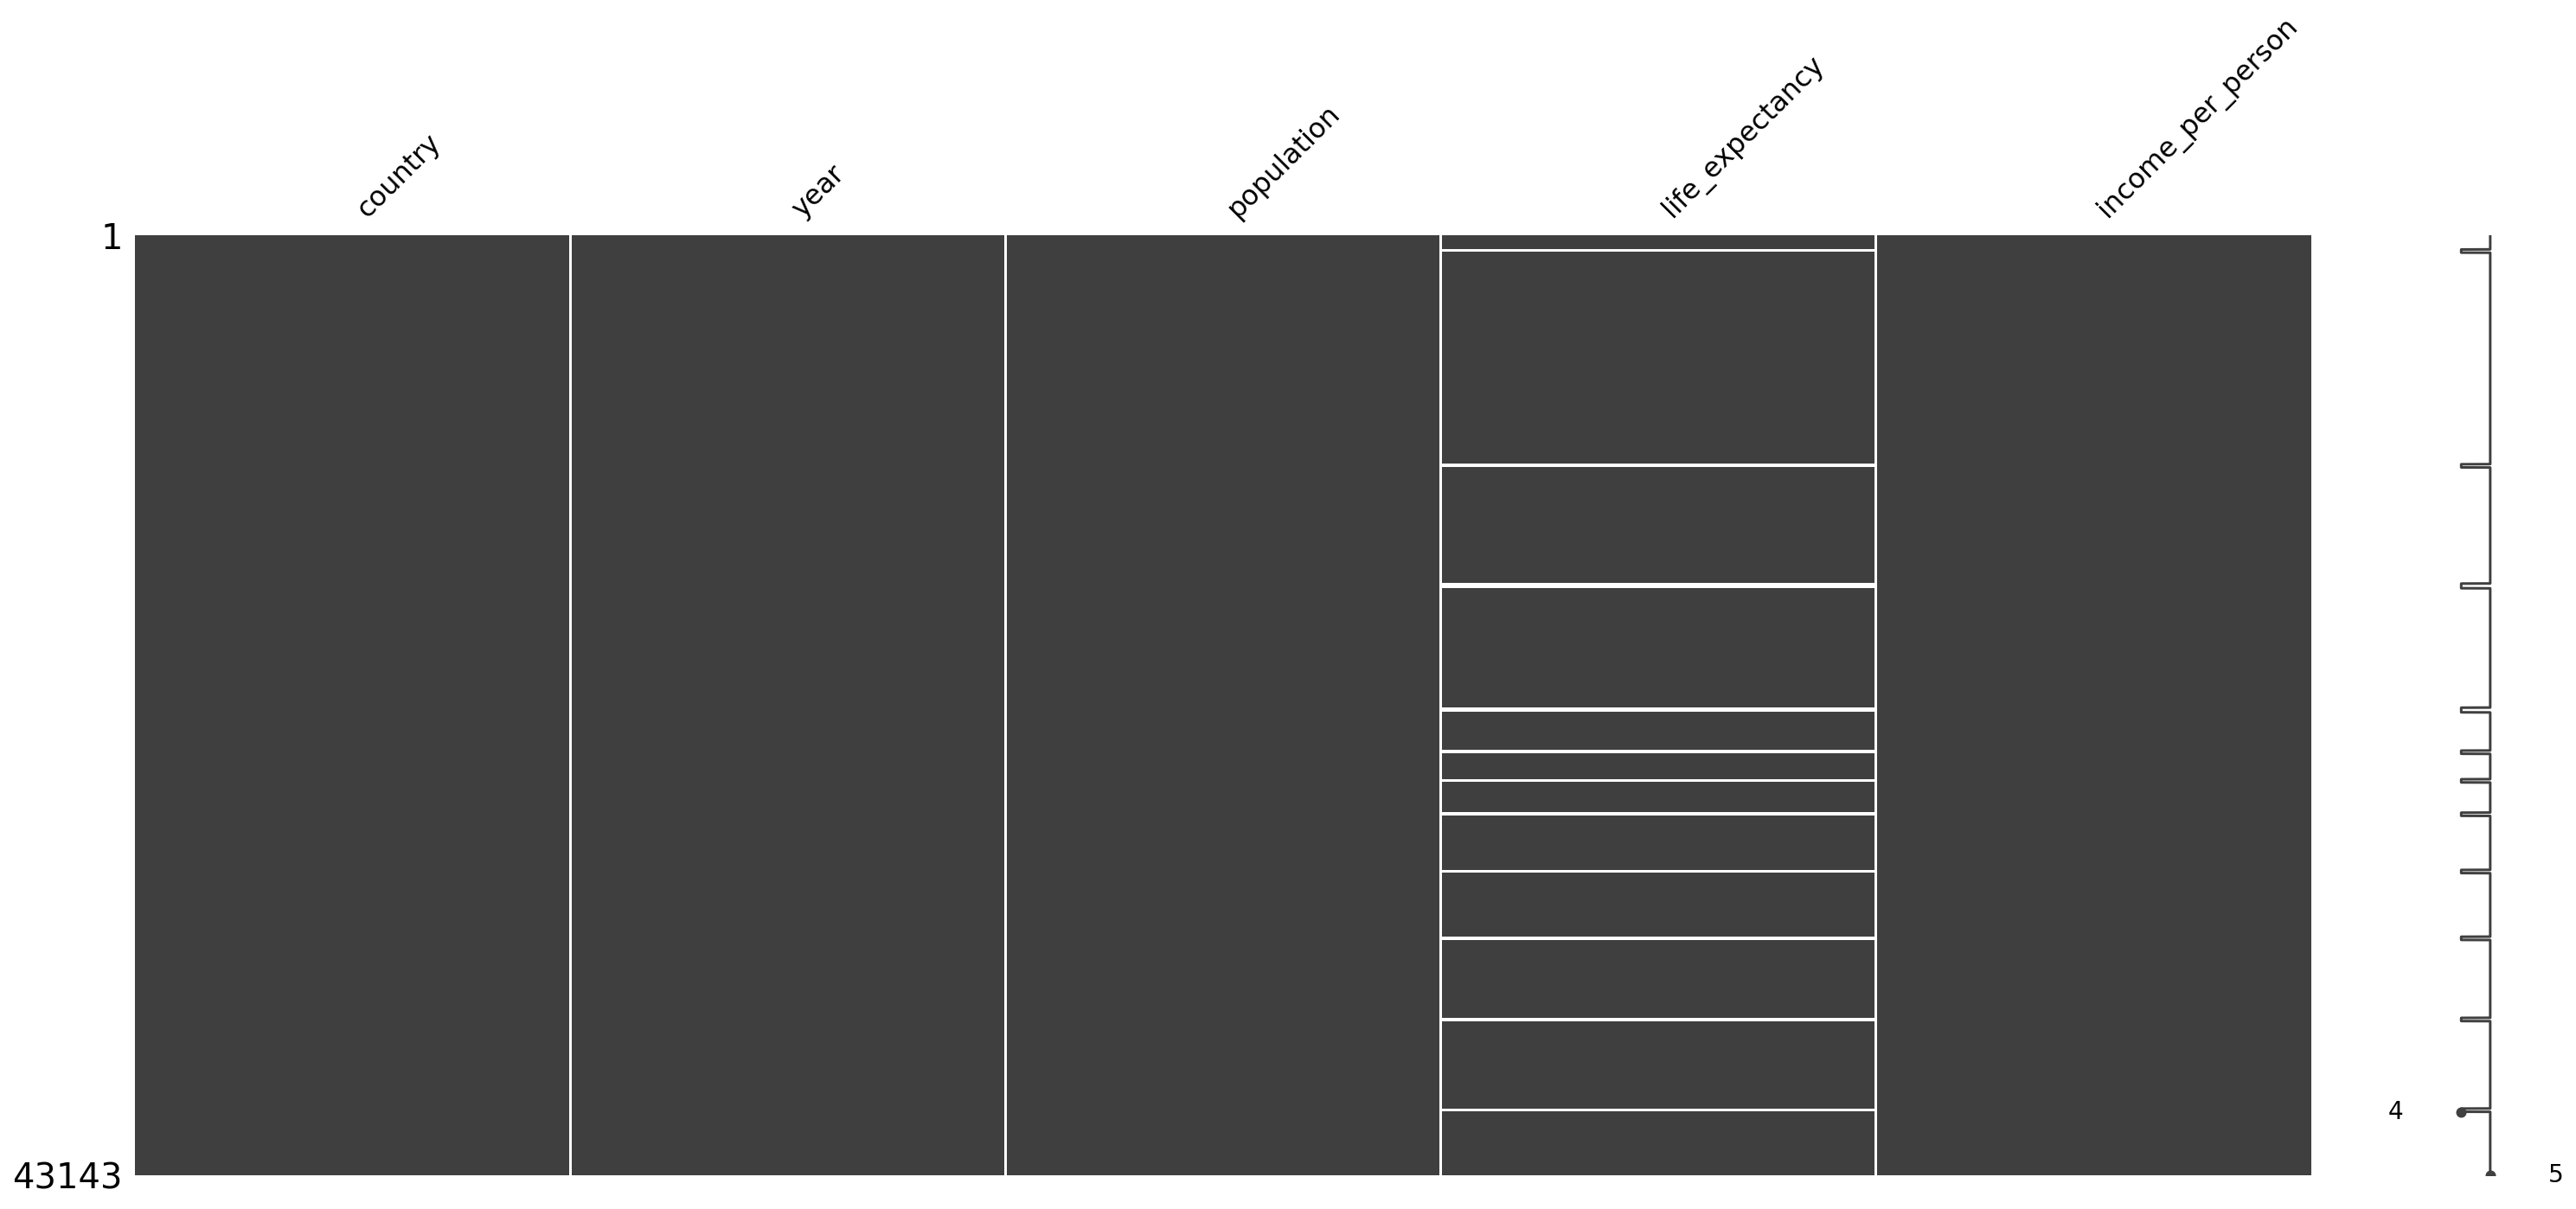

In [55]:
ms.matrix(df_all);

>The next stage is to figure out how to sanitize the data. We can see that there isn't much missing data in the "income per person" column thanks to "missingno," and we've actually replaced missing data in this column with 0 since the column was non-zero before. However, some of the missing data in the "life expectancy" column appears to be on the same level as the missing data in the "missing data" column. If we clean the life expectancy field, we should automatically clean the income per person column as well.

>The simplest way to deal with missing data is to simply remove all of it. However, in this case, it should be avoided because it would result in "inconsistency." For example, if only 48/100 datapoints from one nation are missing and the total is applied to all countries, the resulting data will not be constant over time. So, if only a small amount of data is missing for a certain country, we can impute the data using the country's mean; if too much data is absent, the entire country's data will be discarded. The following defined function should aid in the clarification process.

In [56]:
def df_attr_col(df):
    """
    INPUT: 
        df - Dataframe
    OUTPUT:
        print statements with the chosen metrics (Duplicates, Min/Max Values, Year Span, Unique Values)
    """
    print("##### DUPLICATES ######\n")
    print("Number of duplicated rows:", sum(df.duplicated()),"\n")
    
    print("##### MIN / MAX - VALUES ######\n")
    for x in df.columns:
        print(x, f"- min: {df[x].min()}", f"- max: {df[x].max()}")
        
    print("\n##### YEAR SPAN OF COLUMN #####\n")
    
    for x in df.columns:
        df_year = df.dropna(subset = [x])
        print(x, f"- Min: {df_year.year.min()}", f" - Max: {df_year.year.max()}")
        
    print("\n##### UNIQUE - VALUES ######\n")
    for x in df.columns:
        print(x, f"- Number of entries: {df[x].count()} - Number of unique values: {df[x].nunique()}")

In [57]:
df_attr_col(df_all)

##### DUPLICATES ######

Number of duplicated rows: 0 

##### MIN / MAX - VALUES ######

country - min: Afghanistan - max: Zimbabwe
year - min: 1800 - max: 2018
population - min: 645.0 - max: 1430000000.0
life_expectancy - min: 1.01 - max: 84.8
income_per_person - min: 0.0 - max: 120000.0

##### YEAR SPAN OF COLUMN #####

country - Min: 1800  - Max: 2018
year - Min: 1800  - Max: 2018
population - Min: 1800  - Max: 2018
life_expectancy - Min: 1800  - Max: 2018
income_per_person - Min: 1800  - Max: 2018

##### UNIQUE - VALUES ######

country - Number of entries: 43143 - Number of unique values: 197
year - Number of entries: 43143 - Number of unique values: 219
population - Number of entries: 43143 - Number of unique values: 4511
life_expectancy - Number of entries: 41355 - Number of unique values: 746
income_per_person - Number of entries: 43143 - Number of unique values: 2071


>The first line shows that there is no duplicated data. For the year spans we can see that most of the data is from 1800 - 2018. 
>
>Speaking of unique values, the only interesting fact is that there are 197 different countries considered in the population dataset. 
>
>In the next step we should find out which countries have missing data in the specified column and dataframe.

In [58]:
def print_missing_countries(df, column):
    """
    INPUT: 
        df - dataframe
        column - string 

    OUTPUT:
        returns a list with strings of countries, which has 0 data inside the given dataframe
    """
    list1 = list(df.country.unique())
    list2 = list(df.dropna(subset =[column]).country.unique())
    
    list3 = [x for x in list1 if x not in list2]
    list3.sort()
    
    return list3

>Let's take a closer look on the column with the least rows of data - the "life_expectancy" column.

>Surprisingly there are not many countries missing. Therefore the missing data probably is connected to a time-component. 

In [59]:
print_missing_countries(df_all, "life_expectancy")

['Holy See', 'Liechtenstein']

>For the life_expectancy there are also not many countries missing. In the next cell we will define a function, which prints the amount of missing rows per country.

In [60]:
def print_n_missing_per_country(df, column):
    """
    INPUT: 
        df - Dataframe
        column - string 
    
    OUTPUT: 
        prints the country names and the corresponding number of missing values
        returns a list of strings with countrynames of countries with missing values
    """
    missing = []
    for x in list((df["country"]).unique()):
        n_missing = sum(df[df["country"] == x][column].isnull())
        
        if n_missing > 0:
            missing.append(x)
            print(x, "-", n_missing)
        
    return missing

In [61]:
print_n_missing_per_country(df_all, "life_expectancy");

Andorra - 150
Dominica - 150
Holy See - 219
Liechtenstein - 219
Marshall Islands - 150
Monaco - 150
Nauru - 150
Palau - 150
San Marino - 150
St. Kitts and Nevis - 150
Tuvalu - 150


In [62]:
# to count missing values by country with that function might be possible because we earlier imputed the missing values with 0. 
# Therefore we shall use another way of counting missing values
df_all.loc[df_all['income_per_person'] == 0, 'country'].value_counts()

Holy See           219
Kyrgyz Republic    185
Timor-Leste        183
Tuvalu             180
Liechtenstein      174
                  ... 
Cape Verde          21
Australia           19
Chile               19
North Korea          6
Syria                6
Name: country, Length: 168, dtype: int64

> These countries will also be dropped out later because of too much missing data.


### Data Cleaning

Now the following data cleaning and wrangling steps will be done:
<ol>
    <b>For df_all:</b>
    <li>Drop countries with missing data in life_expectancy</li>
    <li>Transform the columns year, population income_per_person to integer</li>
    <li>Create new dataframes for each metric</li>
</ol>

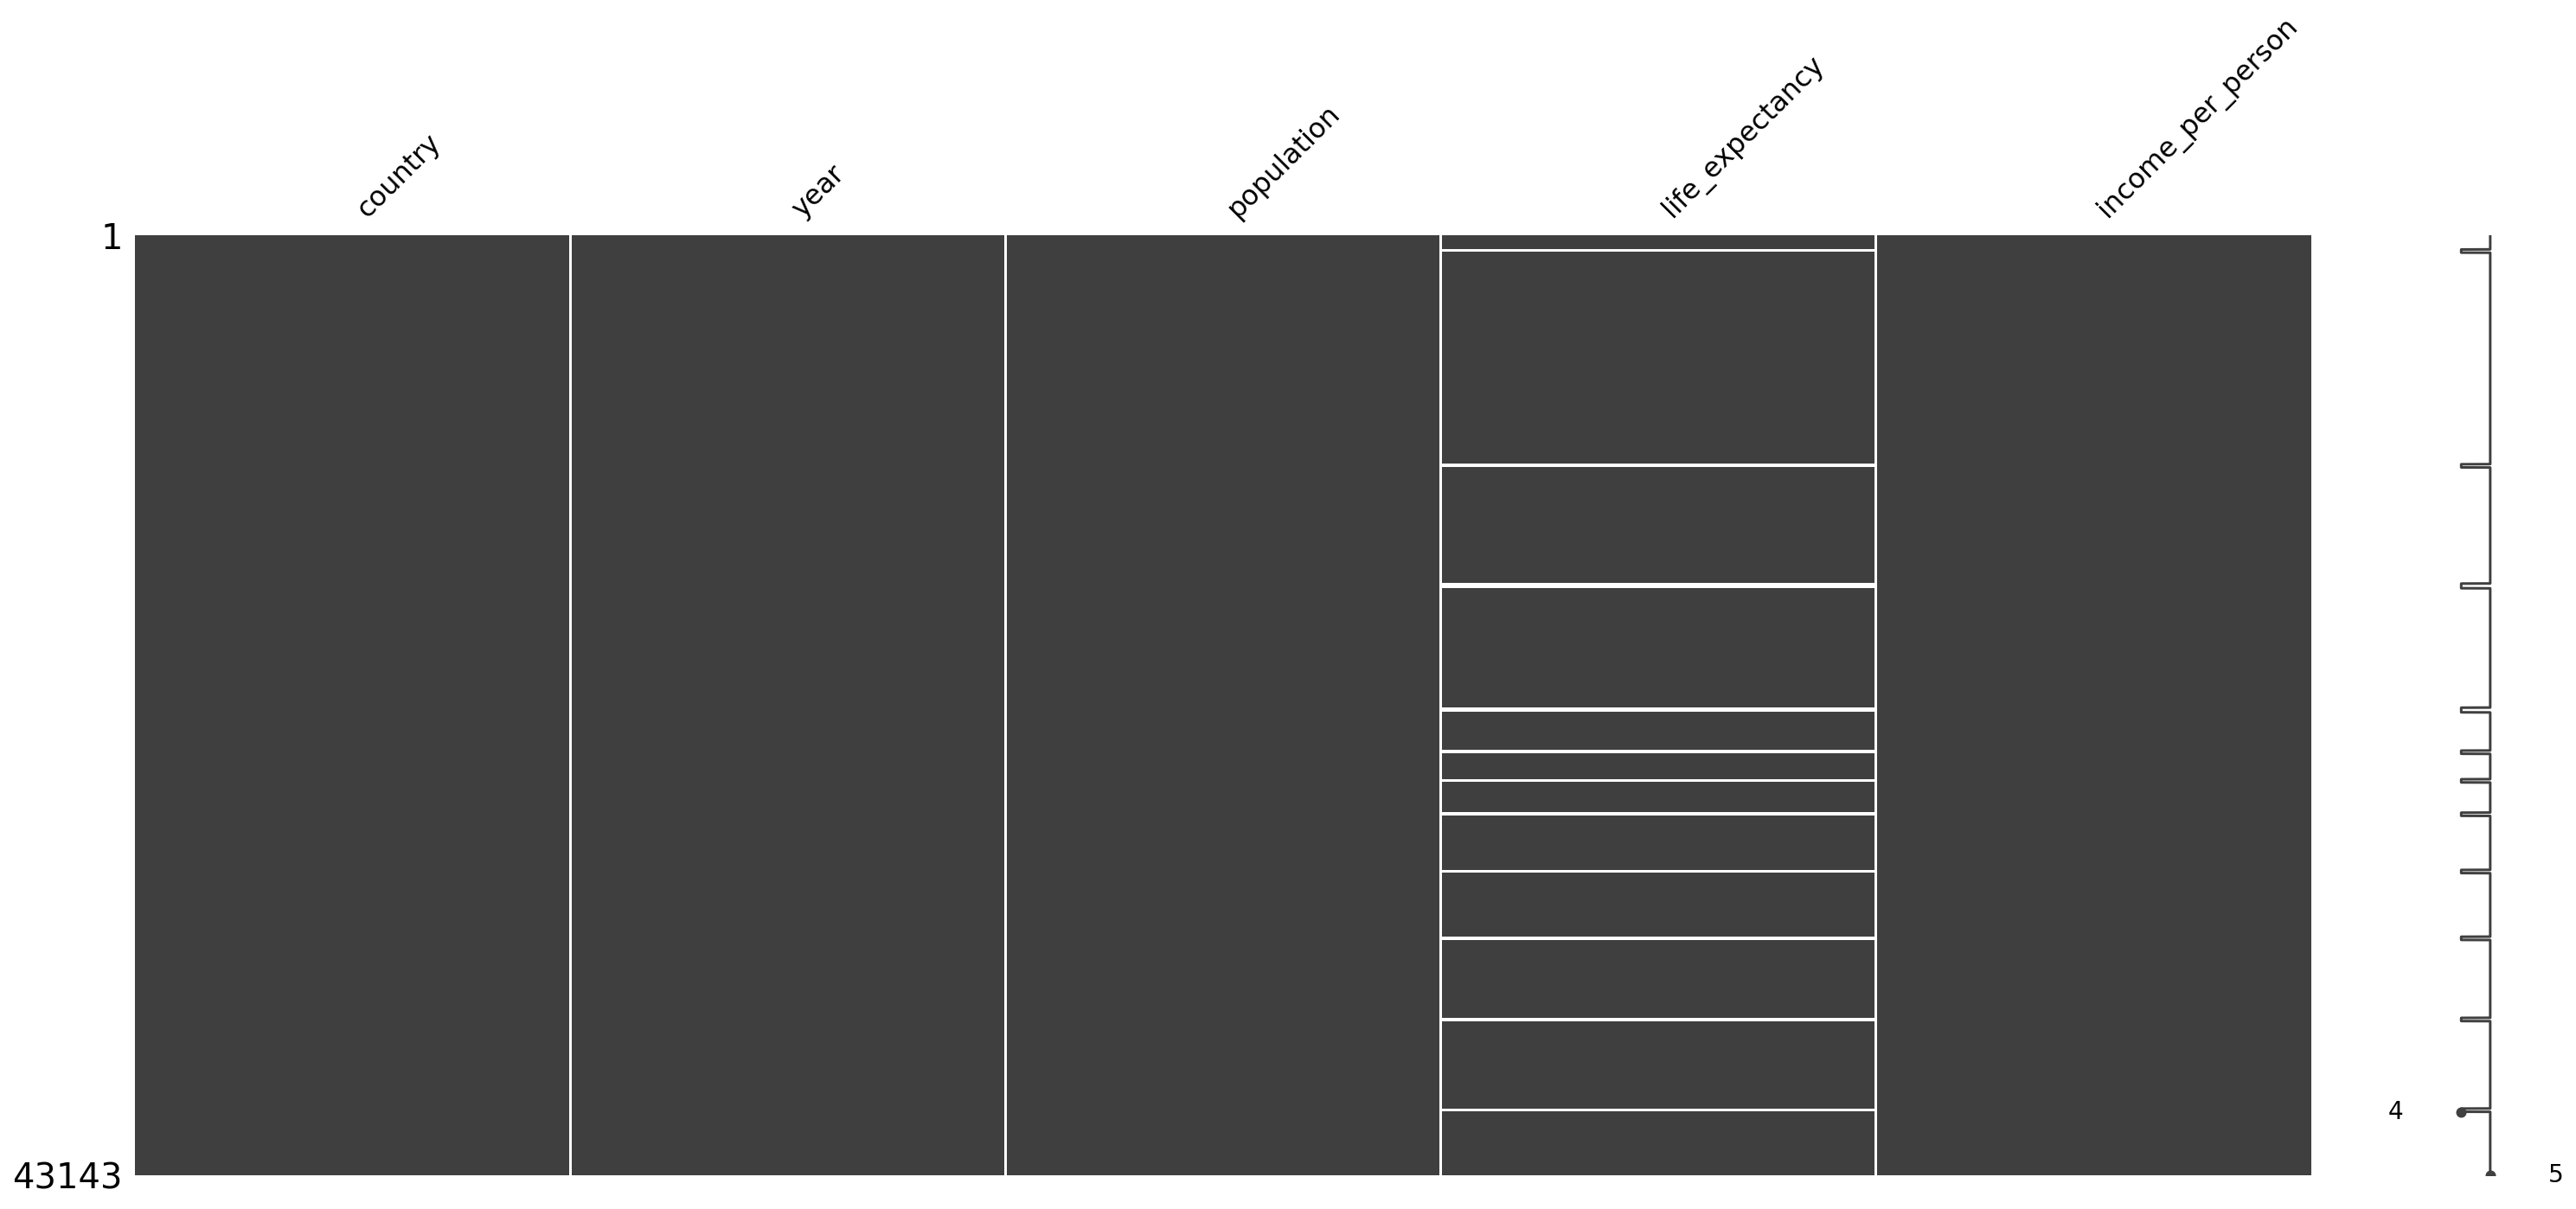

In [63]:
ms.matrix(df_all);

In [64]:
#https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
#https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe

#drop all the countries with missing values
missing_val = print_n_missing_per_country(df_all, "life_expectancy");
df_all = df_all.drop(df_all[df_all["country"].isin(missing_val)].index)  

Andorra - 150
Dominica - 150
Holy See - 219
Liechtenstein - 219
Marshall Islands - 150
Monaco - 150
Nauru - 150
Palau - 150
San Marino - 150
St. Kitts and Nevis - 150
Tuvalu - 150


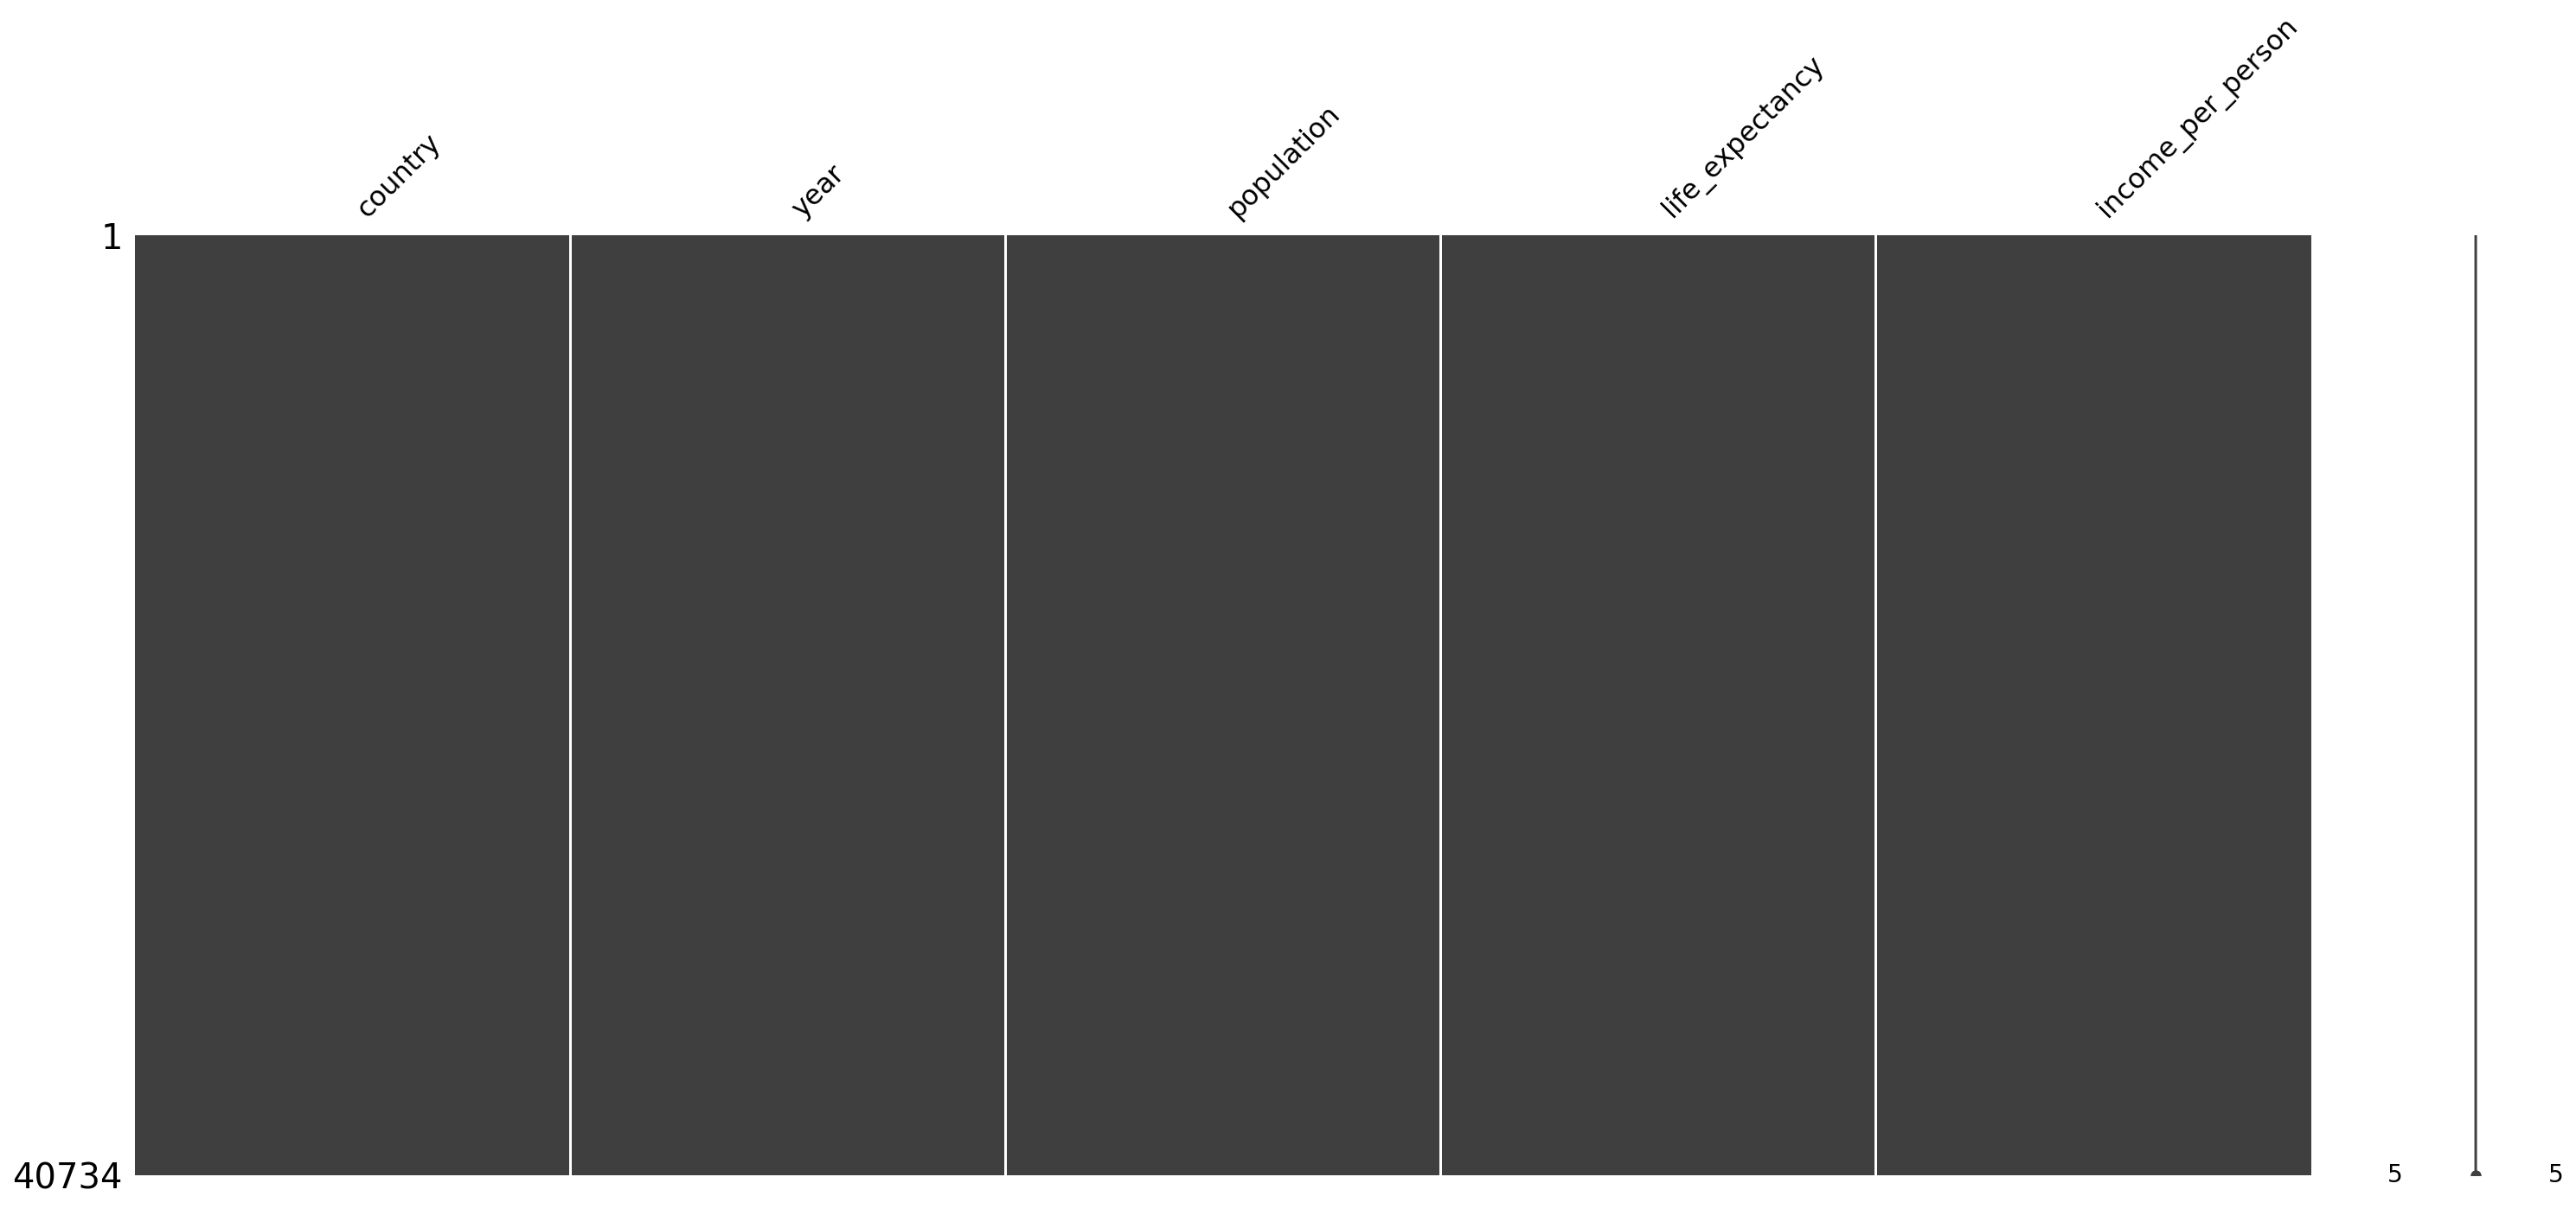

In [65]:
ms.matrix(df_all);

>Now the columns "year" and "income_per_person" will be transformed into the integer type. The sugar_cons cannot be transformed right now, because the column contains missing data. 

In [66]:
#transform column datatypes to int64
df_all.income_per_person = df_all.income_per_person.astype("int64")
df_all.year = df_all.year.astype("int64")
df_all.population = df_all.population.astype("int64")

In [67]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40734 entries, 0 to 43142
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            40734 non-null  object 
 1   year               40734 non-null  int64  
 2   population         40734 non-null  int64  
 3   life_expectancy    40734 non-null  float64
 4   income_per_person  40734 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.9+ MB


>Now separate dataframes for the population, and the income will be created. The income shall share the columns "country", "year" and "population".

In [68]:
#create new dataframes as copies of the df_all dataframe

#create a filtered copy of the df_all dataframe and save it as *.csv without index
df_population = df_all[["country", "year", "population"]].copy()
df_income = df_all[["country", "year", "population", "life_expectancy", "income_per_person"]].copy()

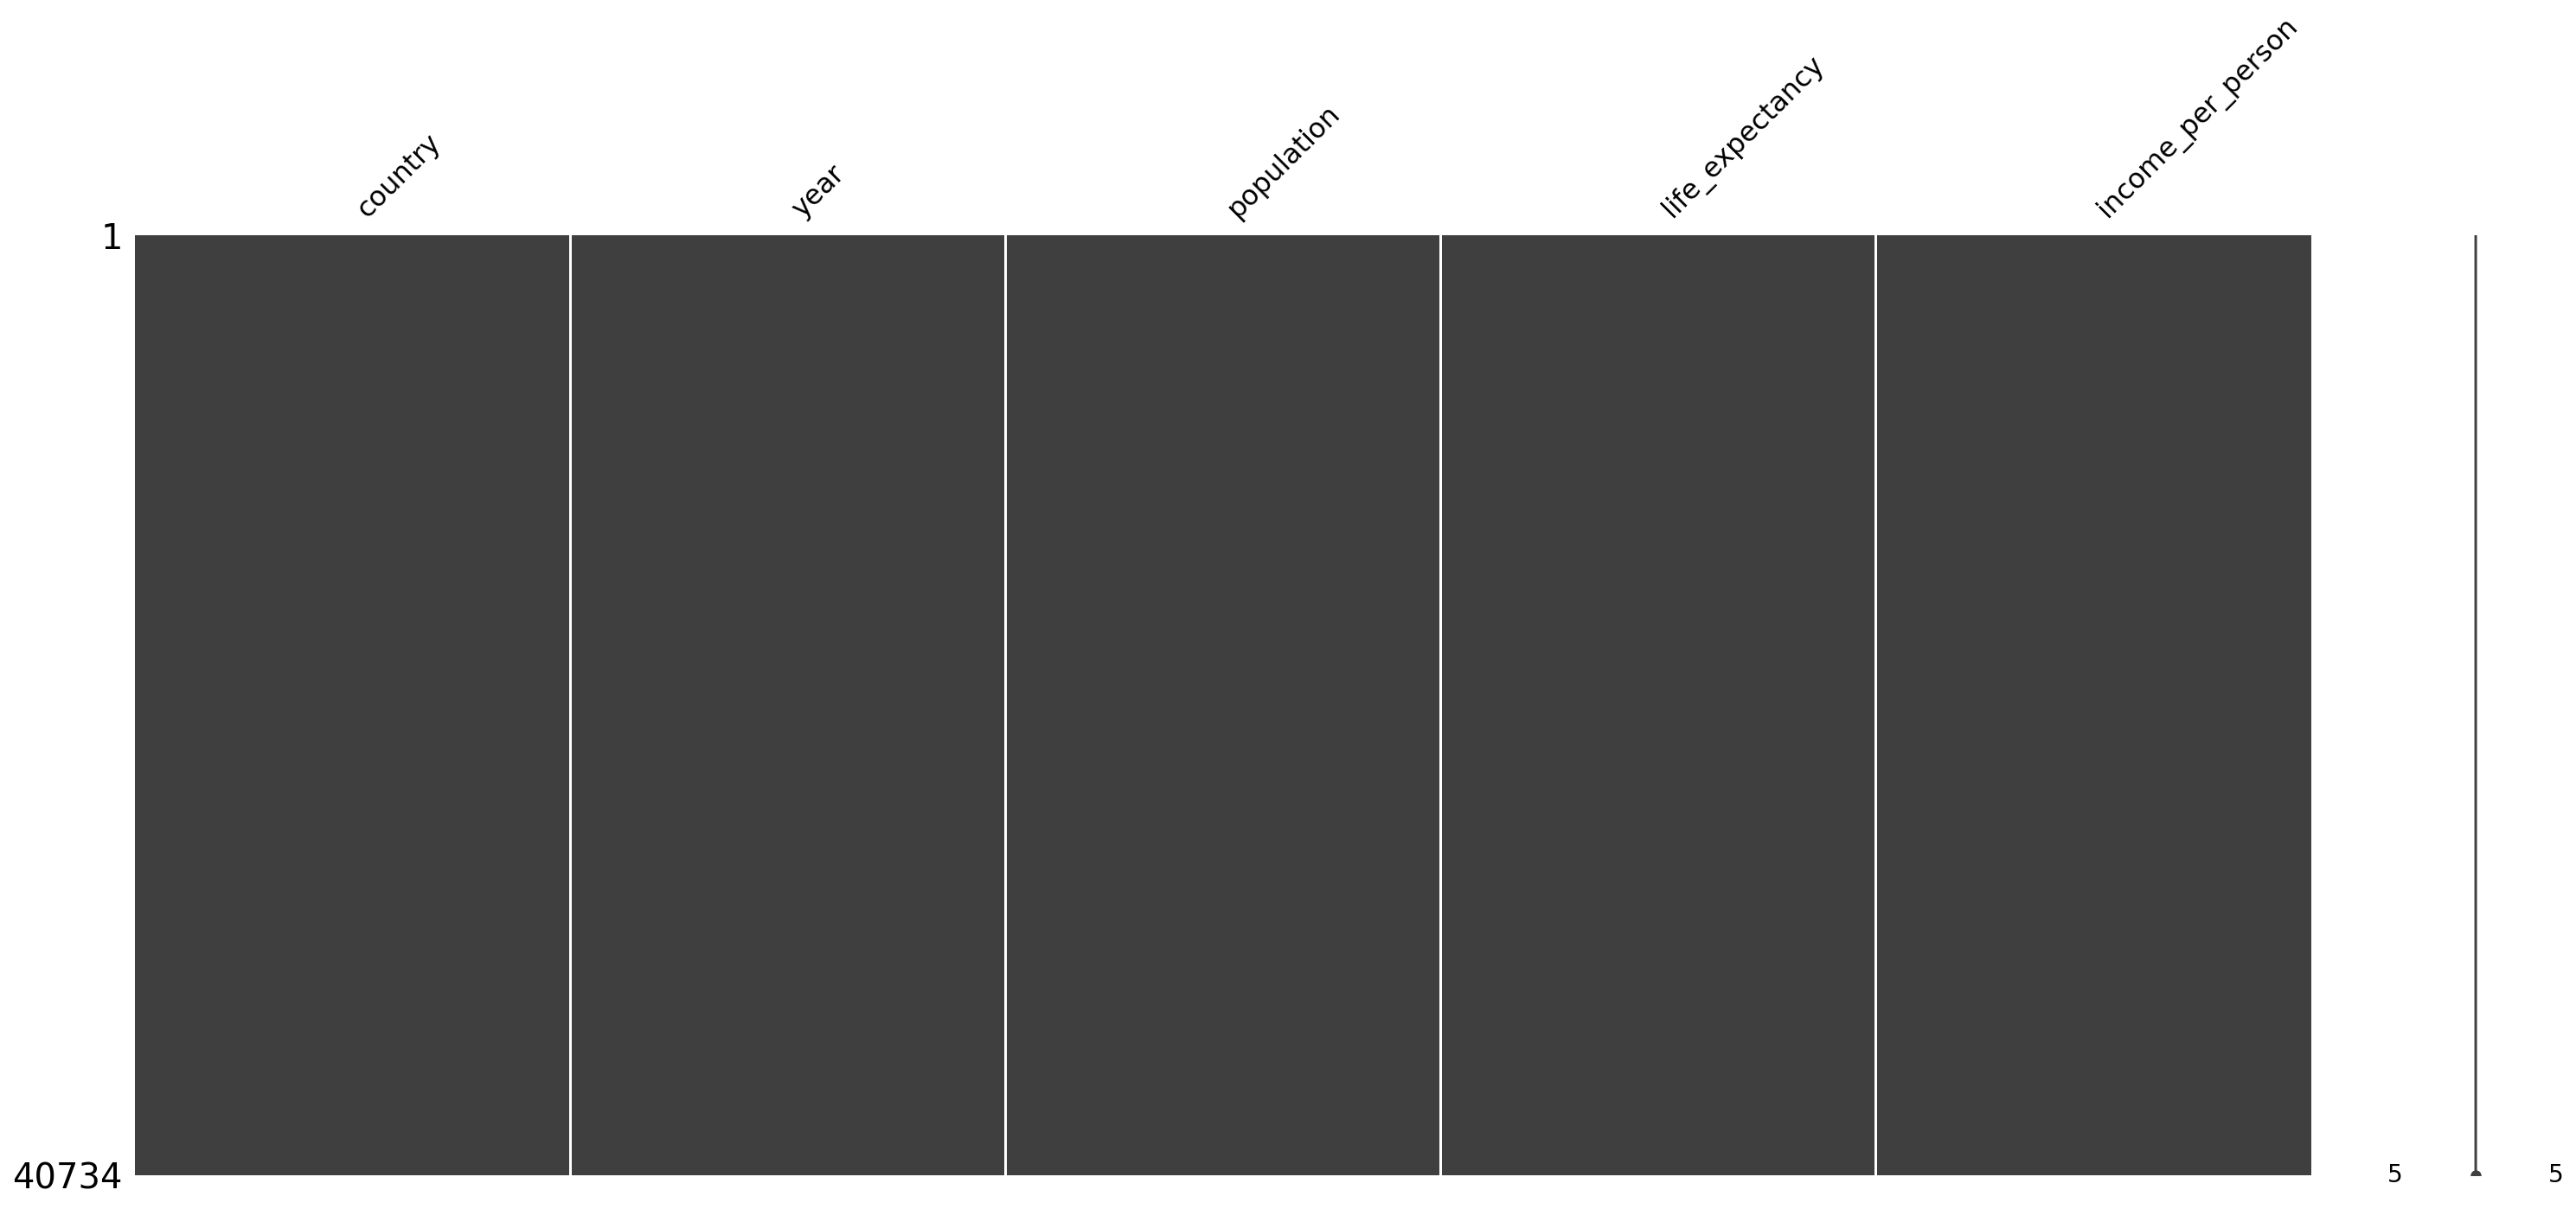

In [69]:
ms.matrix(df_income);

>This dataframe df_income is clear and is now ready to be saved and analyzed. Let's go on with the sugar consume dataframe.

> All newly created dataframes are clean, can be saved and analyzed.

In [70]:
#save the cleaned data into *.csv files
df_population.to_csv("df_population.csv", index = False)
df_income.to_csv("income_clean.csv", index = False)

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: What happened to the world's population over time?

In [71]:
df_population = pd.read_csv("df_population.csv")

In [72]:
df_population.head()

,country,year,population
0,Afghanistan,1800,3280000
1,Afghanistan,1801,3280000
2,Afghanistan,1802,3280000
3,Afghanistan,1803,3280000
4,Afghanistan,1804,3280000


We shall be plotting a lineplot with this dataset in which several functions will be defined to turn the plotting part into an one-liner to make the future extension of this project more easy.

The lineplot should contain the following:

<ul>
    <li>A lineplot showing the change over time</li>
    <li>The chosen bins, including the delta between the bins</li>
    <li>The axis labels should be dependent on the data and function which was be used to aggregate the data</li>
</ul>

> I also want to maintain customizability, therefore the y-data labels should be movable, there should be a faktor to alter the plotted data labels, and the bin size should be configurable.
> The first function does this by calculating the bins and adding the bin-names to the dataframe. The following function sums (or means) the data and calculates data on and between the bin edges. It also gathers some general information for charting. The charting part is handled by the third function, which is dependent on the outcomes of the previous functions, and the communication between these processes is handled by the last function. This is not the final version of these functions because there is still potential for development, but they do a good job of analyzing the data. 

In [73]:
def plot_bins(df, span = 25, start_value = None, end_value = None):
    """
    INPUT: 
        df - dataframe to add the bins
        span - integer, distance between the borders of the edges
        start_value - integer, first year
        end_value - integer, last year
    
    OUTPUT:
        bin_edges - list of bin edges as integers, which can be used with pd.cut
        bin_names - list of strings with bin names
        start_value - returns the input start_value 
        end_value - returs the input end_value
    """
    
    #if no values are specified, take the min and max years of the given dataframe
    if start_value == None:
        start_value = min(df.year)
        
    if end_value == None:
        end_value = max(df.year)
    
    #create the edges of the bins and take the index 0 and reduce it -1, so that pd.cut takes the start value into its calculation
    bin_edges = [x for x in range(start_value,end_value, span)]
    bin_edges.append(end_value)
    bin_edges[0] = bin_edges[0] - 1
    
    bin_names = []
    
    #join the bin edges together with a "-"
    for i, x in enumerate(bin_edges):
        try:
            bin_names.append(" - ".join([str(bin_edges[i] + 1), str(bin_edges[i+1])]))
        except:
            pass
        
    #create and add the "bins" column to the given df with bin_names       
    df["bins"] = pd.cut(df["year"], bin_edges, labels = bin_names)
    
    return bin_edges, bin_names, start_value, end_value

In [74]:
def plotdata_prep(df, feature, bin_edges, faktor = 1, func = "sum"):
    """
    INPUT:
        df - dataframe with the added column "bins"
        feature - string, columnname which should be prepared
        bin_edges - list of bin_edges, created with func "add_bins"
        faktor - integer, the calculated data will be divided by this factor for better overview in the plot
        func - can be anything, if func is not "sum", it will automatically take the mean of the feature
    
    OUTPUT:
        bin_vales - dataframe based on the input dataframe, grouped after the created bins and added with information like the 
                    feature value of the first year, the second_year, the change in the feature and the position of the labels
                    inside the plot
        year_data - dataframe grouped by years
    """
    
    #group the data by years
    if func == "sum":        
        year_data = df.groupby("year", as_index = False).sum()
    else:
        year_data = df.groupby("year", as_index = False).mean()
                
    #group the data by the created bins
    bin_values = df[["bins", feature]].groupby("bins", as_index = False).sum()
    
    year_firstbin = []
    year_secondbin = []
    feature_change =  []
    change_y = []
    change_x = []

    #filter the dataframes by the given bin_edges and get the feature values to the corresponding years
    for i, x in enumerate(bin_edges):
        try:
            if bin_edges[i] != 1799:
                val1 = int(year_data[year_data.year == bin_edges[i+1]][feature])
                val2 = int(year_data[year_data.year == bin_edges[i]][feature])
            else:
                val1 = int(year_data[year_data.year == 1825][feature])
                val2 = int(year_data[year_data.year == 1800][feature])
            
            #append the created lists by the values
            
            #calculate the feature change
            feature_change.append((val1 - val2)/faktor)
            
            #the change value should be plotted on the half of the y-value
            change_y.append(val2/2)
            
            #there are a span of 25 years, so the x value for the change should be the half of it - basically span/2, 
            #or (year2 - year1 / 2), will be added later
            change_x.append(bin_edges[i]+12.5)
            year_firstbin.append(val2)
            year_secondbin.append(val1)

        except:
            pass
    
    #add the data to the bin_values dataframe
    bin_values["feature_change"] = feature_change
    bin_values["change_x"] = change_x
    bin_values["change_y"] = change_y
    bin_values["year_firstbin"] = year_firstbin
    bin_values["year_secondbin"] = year_secondbin
    
    return bin_values, year_data


In [75]:
def plot_data(df, bin_values, feature, start_value, end_value, bin_edges,
              faktor = 1, scale_y = 1.05, scale_y_pos = 1, func = "sum", integer = False, span = 25):
    """
    INPUT:
        df - dataframe
        bin_values - dataframe created with function prepare_plotdata
        feature - the feature which should be plotted
        start_value - integer, starting year 
        end_value - integer, ending year
        bin_edges - list of integers with bin edges
        faktor - integer for scaling the data
        scale_y - float to scale the y axis
        scale_y_pos - float to customize the y-label pos
        func - string, pass the used func for axis labeling
        integer - boolean, if True, all values will be turned into integer
        span - integer, distance between years for plotting - will be optimized later
        
    OUTPUT:
        lineplot
    
    """
    
    #create a matplotlib figure and axes
    fig, ax = plt.subplots(figsize = (17,8))
    
    #https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
    plt.rcParams.update({'font.size': 11})
    
    x = df["year"]
    y = df[feature]
    
    #plot the line
    ax.plot(x,y, color = "steelblue", lw = 4)
    
    #fill the area between the x - values and 0
    ax.fill_between(x, 0, y, color = "lightgray", alpha = 0.4)
    
    #plot vertical lines to visualize the bins
    for x in range(start_value,end_value,span):
        y_vline = df[df.year == x][feature]
        ax.plot((x,x),(0,y_vline), color = "black", lw = 2, alpha = 0.7)    
        
    #set the y label of the plot
    ax.set_ylabel(f"{func} of the {feature} (based on countries in this dataset)")
    #set the x label of the plot
    ax.set_xlabel("Year")
    #set the title of the plot
    ax.set_title(f"{feature} development")
    #disable the right and top spine for better look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    #add the "feature change between bins" text to the plot
    for i, x in enumerate(list(bin_values.change_x)):
        if integer == False:
            plot_val_delta = round(float(bin_values.loc[i].feature_change),3)
            plot_year_val = round(float(bin_values.year_secondbin.iloc[i]/faktor),3)
        else: 
            plot_val_delta = int(bin_values.loc[i].feature_change)
            plot_year_val = int(bin_values.year_secondbin.iloc[i]/faktor)
            
        ax.text(x, int(bin_values.iloc[i].change_y), 
                s = (u'\u0394' + f" {plot_val_delta}"),horizontalalignment='center')
        
        
    #add the value text of the bin_edges
    for i, x in enumerate(bin_edges[1:-1]):
        
        if integer == False:
            plot_year_val = round(float(bin_values.year_secondbin.iloc[i]/faktor),3)
        else: 
            plot_year_val = int(bin_values.year_secondbin.iloc[i]/faktor)
            
        ax.text(x, int(bin_values.year_secondbin.iloc[i]+scale_y_pos), 
                s = f"{plot_year_val}", horizontalalignment='center')
        
        
    #set axis limits
    ax.set_xlim(1800, 2018)
    ax.set_ylim(0,max(bin_values.year_secondbin*scale_y))
    #tighten the plot layout
    plt.tight_layout()

    #show the plot (basically not necessary for jupyter but I always put it at the end)
    plt.show()

In [76]:
def create_plot(df, feature, data_faktor = 1, scale_y = 1, func = "sum", integer = False, span = 25):
    """
    INPUT:
        df - dataframe
        feature - string with the feature which should pe plottet
        data_faktor - integer/float to change the scale of data
        scale_y - integer/float to scale the position of the y-label
        func - string with the function, <> "sum" will result in using the mean
        integer - boolean, if True, all the values will turned into integers
        span - distance between bins
        
    Output:     
        lineplot
    """
    
    bin_edges, bin_names, start_year, end_year = plot_bins(df);
    
    bin_values, year_data = plotdata_prep(df, feature, bin_edges, faktor = data_faktor, func = func);
    
    plot_data(
        df = year_data, 
        bin_values = bin_values,
        bin_edges = bin_edges,
        feature = feature, 
        span = span, 
        faktor = data_faktor, 
        scale_y_pos = scale_y, 
        func = func, 
        integer = integer,
        start_value = start_year,
        end_value = end_year);

c:\Users\Adejumobi.Oluwafemi\Anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


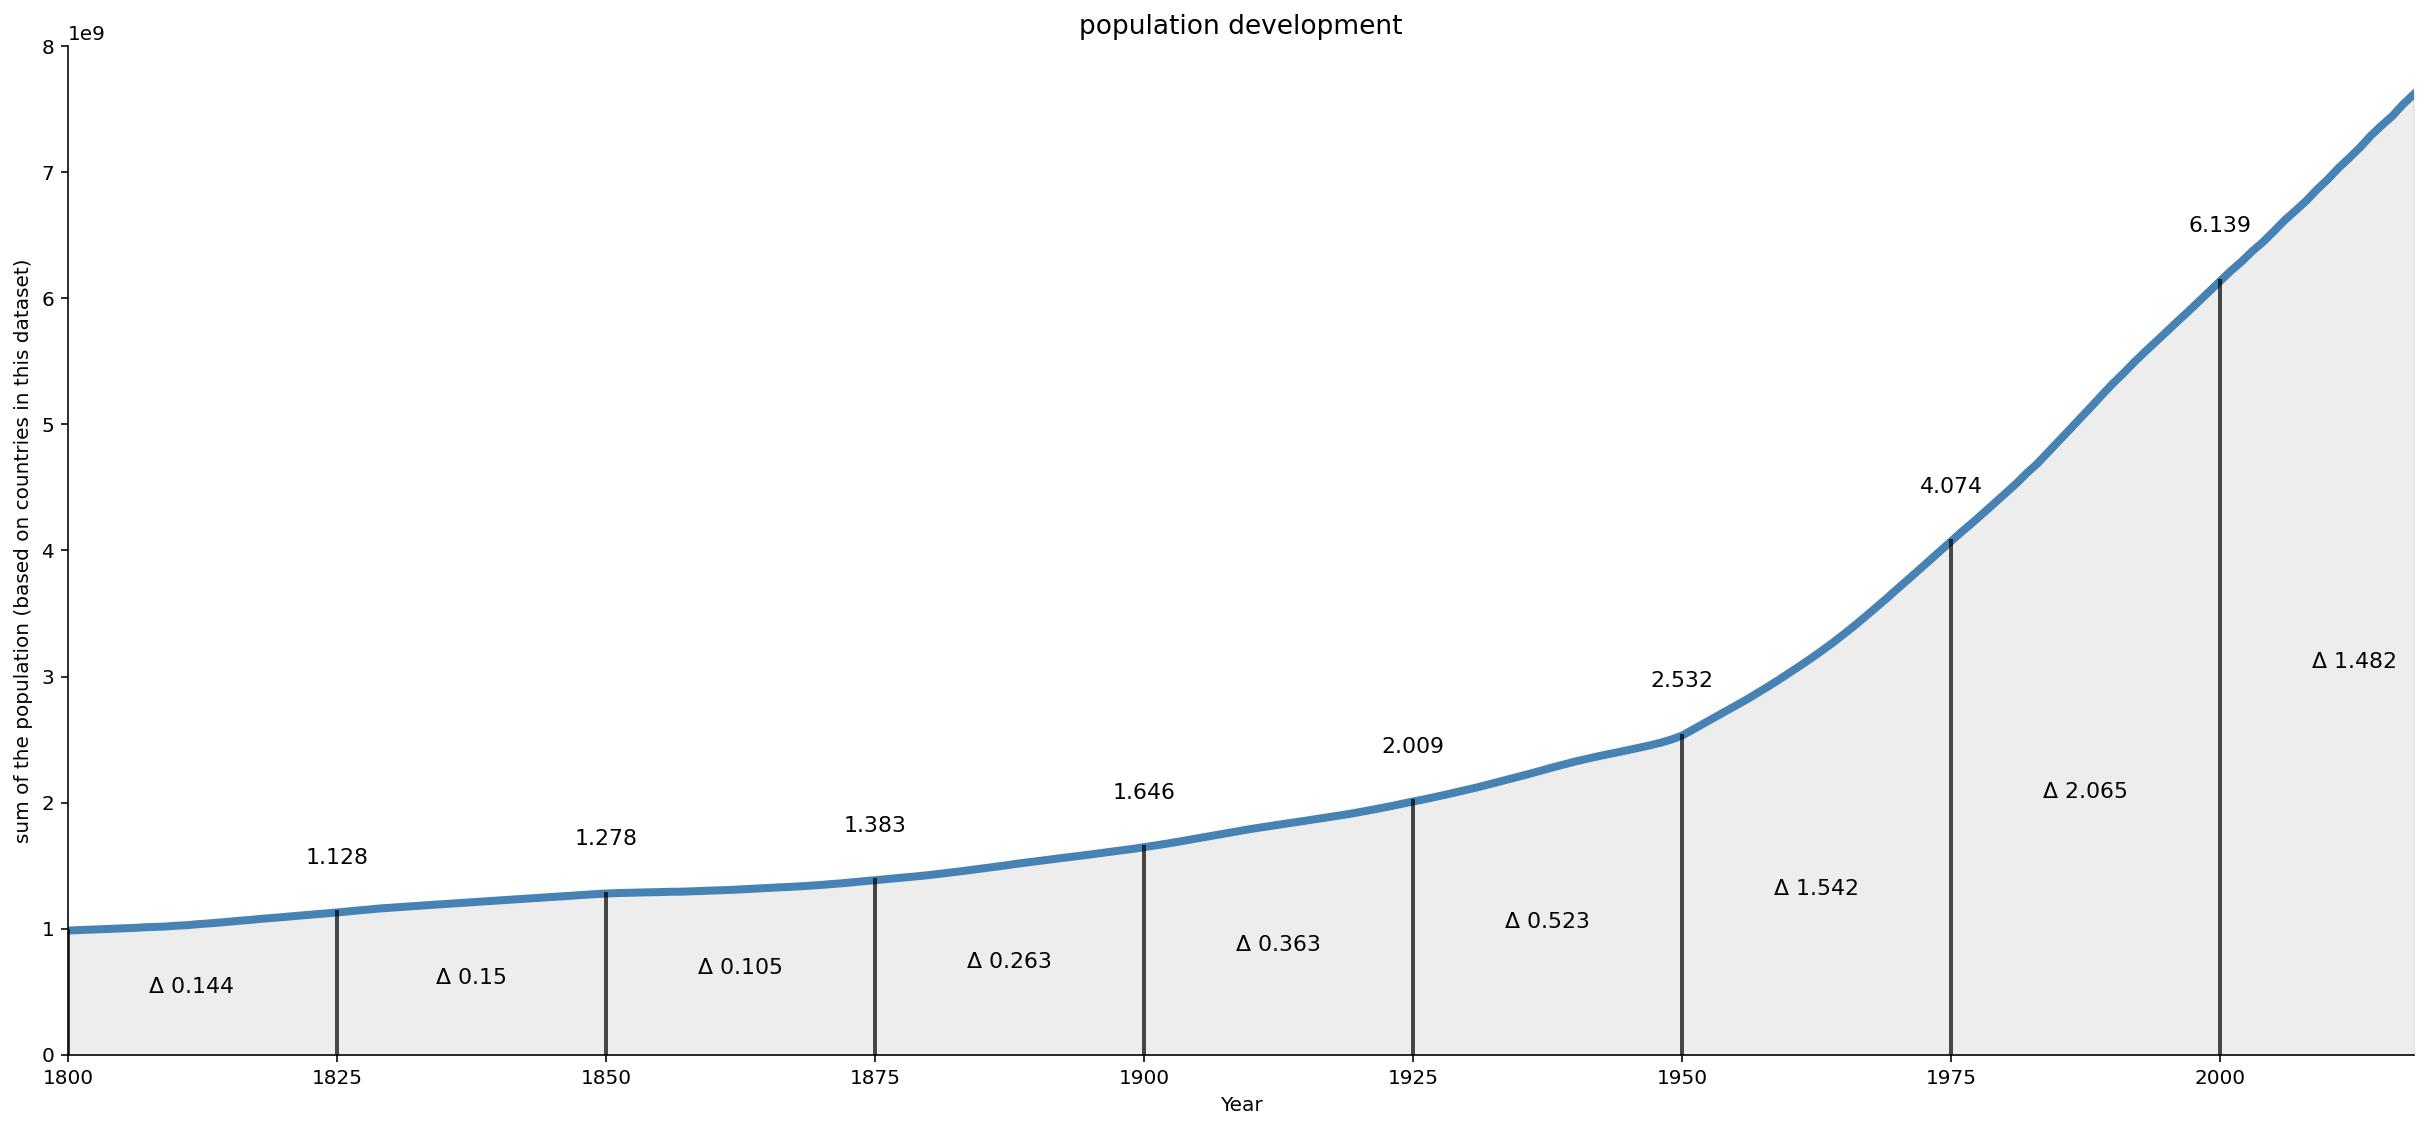

In [77]:
create_plot(df = df_population, feature = "population", data_faktor = 1000000000, scale_y = 9**9)

In [78]:
# validation
df_population.groupby("year", as_index = False).sum().query("year == 2000")

,year,population
200,2000,6138809392


> The first thing to notice when looking at the graph is that the x-axis (population total) is scaled to 1e9 (x109). The years are represented on the y-axis. The bins in this case have a 25-year lifespan. Considering the countries in this dataset, we can notice a rising size of the global population over time. Until 1875, the delta between bin edges in the first three bins seems to be stuck at 0.125 * 1009. Following that, the delta of the bins grows in each bin, at first'slowly,' but then rapidly around 1950, with a continuous trend.
>
>To put it another way, the world population expanded by 1.531 * 109% between 1950 and 1975, which is roughly equal to the whole rise from 1800 to 1950. There are many variables that contribute to this trend, such as industrialization and increased knowledge.

In [79]:
population_2018 = int(df_population.groupby("year", as_index = False).sum().query("year == 2018").population)
population_1800 = int(df_population.groupby("year", as_index = False).sum().query("year == 1800").population)

print("Population 1800: ", population_1800)
print("Population 2018: ", population_2018)
print("Increase: ", round(population_2018/population_1800 * 100, 2), "%")

print("Possible Delta for 2000 - 2025: ", round(1.492/18*25, 2))

Population 1800:  984380759
Population 2018:  7621047397
Increase:  774.2 %
Possible Delta for 2000 - 2025:  2.07


>Between 1800 and 2018, there was an 801.76 percent rise in global population. If we do a simple calculation and assume that the real trend between 2000 and 2018 remains unchanged, the delta in the next bin might be 2.07 * 109, which means that by 2025, we will have passed the 1 * 1010 population mark.


>The next cell defines a function to look at the top/bottom five changers, as well as the minimum and maximum values for the years in question.

In [80]:
def compare_df(df, year1, year2, label):
    """
    INPUT: 
        df - dataframe
        year1 - integer, first year
        year2 - integer, second year
        label - string, customize the print
        
    OUTPUT:
        print statements
    """
    
    df_compare = df[["country", year1, year2]].copy()
    
    #calculate the percentage of change
    df_compare["change_perc"] = df_compare[[year1, year2]].apply(lambda x: round(x[1] * 100 /x[0],2), axis = 1)
    
    #sort the values
    df_compare.sort_values("change_perc", ascending=False, inplace=True)
    
    print(f"-- Top 5 Changers in {label} (%) --\n")
    
    print(df_compare.head(5))
    
    print(f"\n-- Bottom 5 Changers in {label} (%) --\n")
    
    print(df_compare.tail(5))
     
    #sort the values
    df_compare.sort_values(year1, ascending=False, inplace=True)
    
    print(f"\n-- Maximum {label} in {year1} --\n")
    print(df_compare.head(5))
    
    print(f"\n-- Minimum {label} in {year1} --\n")
    
    print(df_compare.tail(5))
    
    df_compare.sort_values(year2, ascending=False, inplace=True)
    
    print(f"\n-- Maximum {label} in {year2} --\n")
    print(df_compare.head(5))
    
    print(f"\n-- Minimum {label} in {year2} --\n")
    
    print(df_compare.tail(5))
   
    
    df_compare = None   

### Question 2: How have life expectancy and per capita income evolved over time?

In [89]:
df_income = pd.read_csv("income_clean.csv")

In [90]:
df_income.head()

,country,year,population,life_expectancy,income_per_person
0,Afghanistan,1800,3280000,28.2,472
1,Afghanistan,1801,3280000,28.2,0
2,Afghanistan,1802,3280000,28.2,0
3,Afghanistan,1803,3280000,28.2,0
4,Afghanistan,1804,3280000,28.2,0


c:\Users\Adejumobi.Oluwafemi\Anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


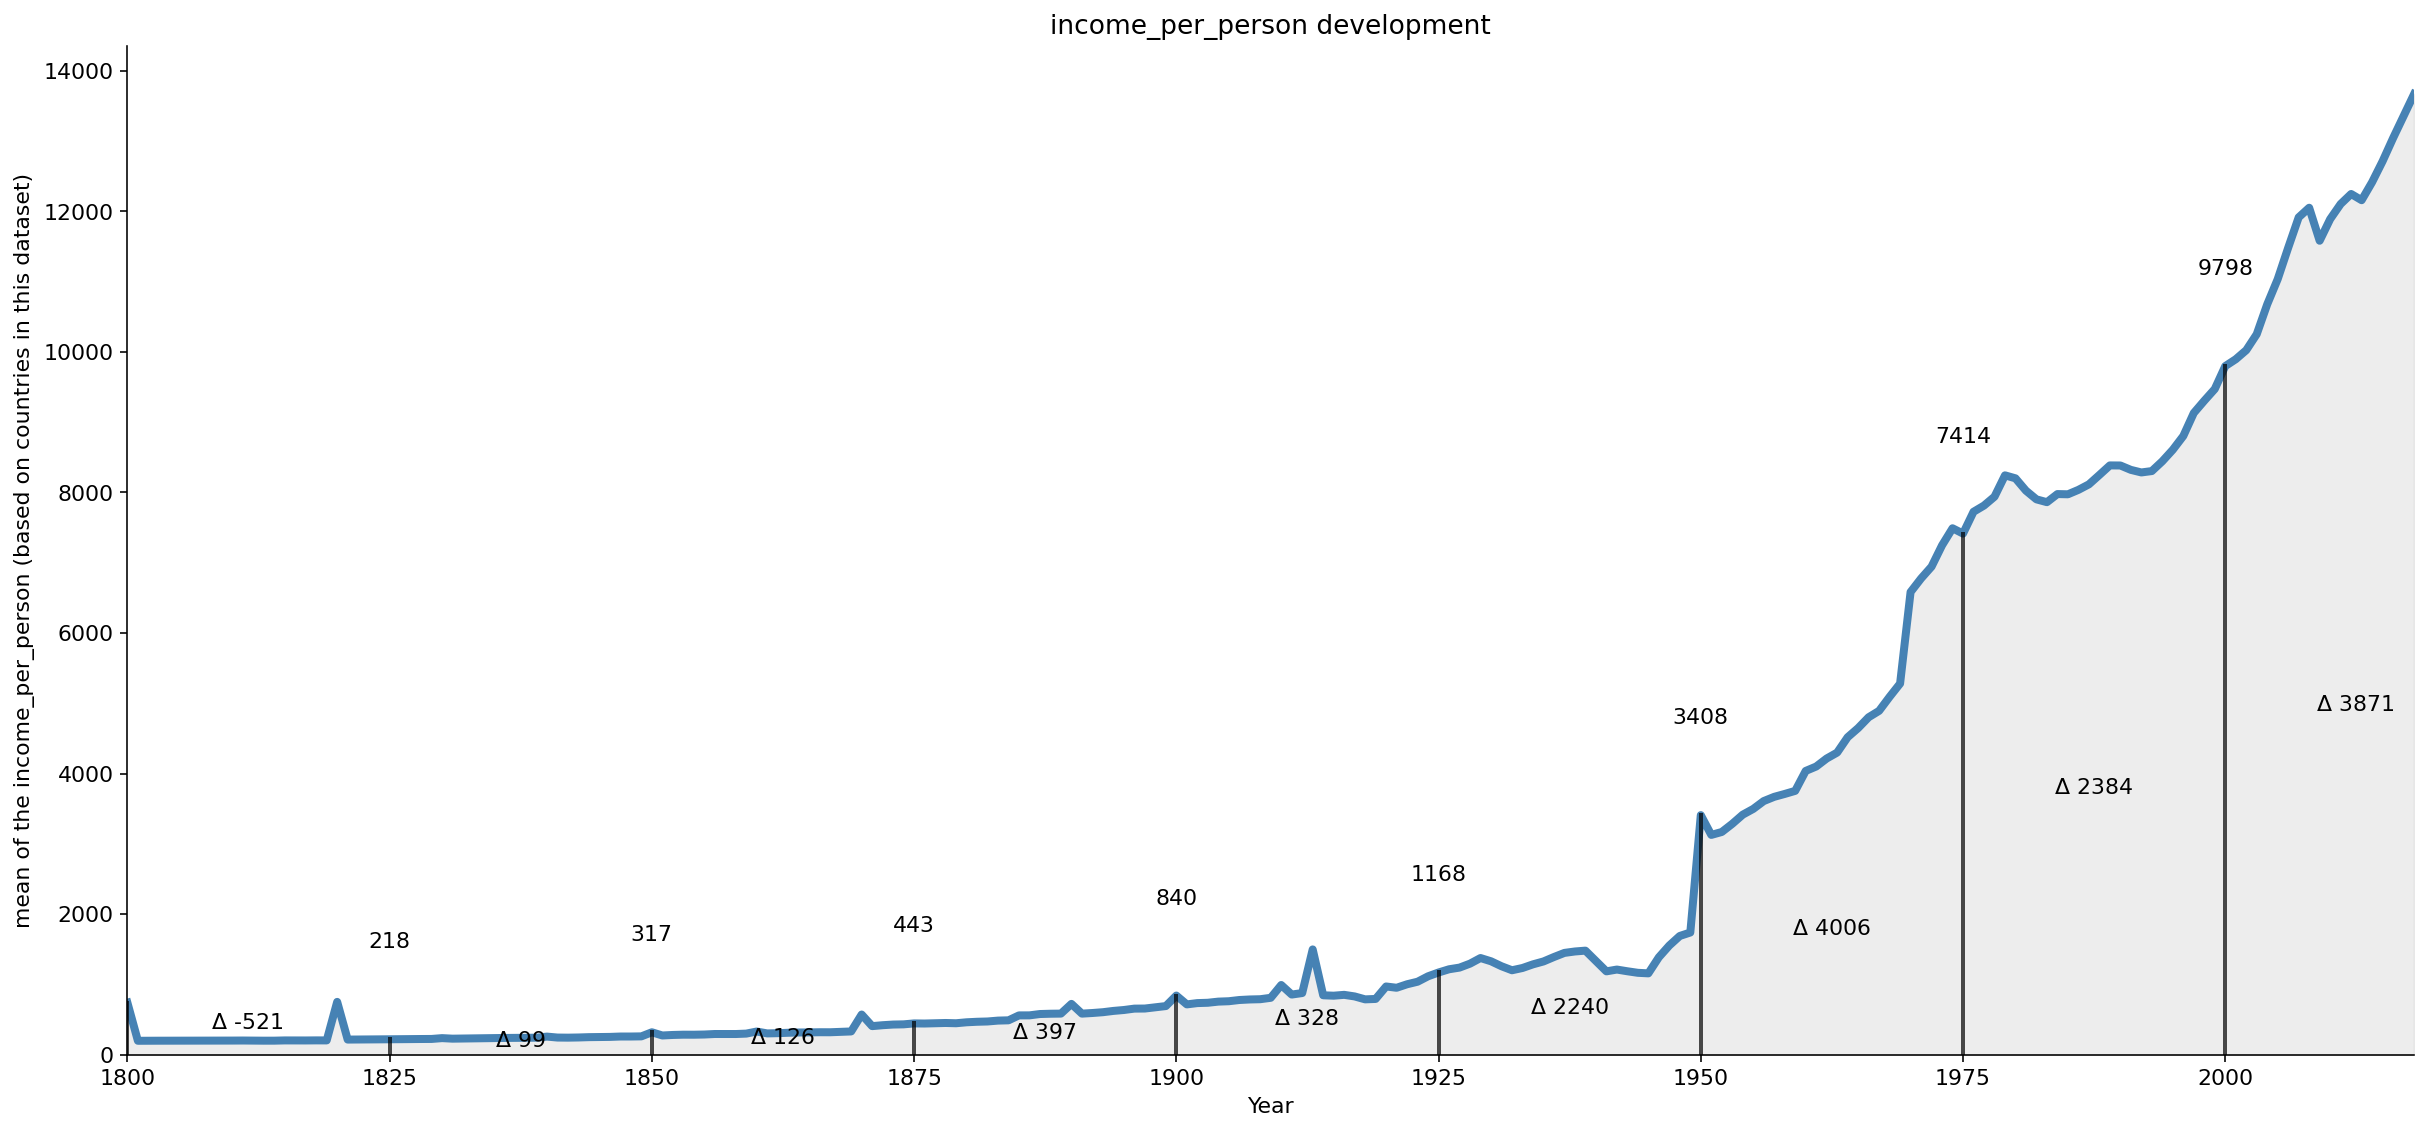

In [91]:
create_plot(df_income, "income_per_person", func = "mean", integer = True, scale_y=1300)

> This graph depicts the average annual income per person for all of the nations included in this dataset. Between 1800 and 1925, the average household income increased slowly but steadily. The average income per person climbed more from 1925 to 1950 than it did from 1800 to 1925 combined. Between 1950 and 1975, we can see a significant growth in average per capita income, which could be attributed to the second industrial revolution. There is a dip about 1980, which could be due to the early 1980s recession. Following the financial crisis in 2009, the average income per person began to rise again, followed by another uptrend.

In [92]:
income_2018 = int(df_income.groupby("year", as_index = False).mean().query("year == 2018").income_per_person)
income_1800 = int(df_income.groupby("year", as_index = False).mean().query("year == 1800").income_per_person)

print("Income per person 1800: ", income_1800)
print("Income per person 2018: ", income_2018)
print("Increase: ", round(income_2018/income_1800 * 100, 2), "%")

print("Possible Delta for 2000 - 2025: ", round(4262/18*25, 2))

Income per person 1800:  739
Income per person 2018:  13669
Increase:  1849.66 %
Possible Delta for 2000 - 2025:  5919.44


>From 1800 to 2018, the average household income climbed by 1896 percent. If the pattern between 2000 and 2018 remains unchanged, the bin from 2000 and 2025 will most likely show a delta of 5919. Overall, there is an upward tendency in per capita income.

In [93]:
compare_df(life_expectancy.dropna(), "1800", "2018", "life_expectancy")

-- Top 5 Changers in life_expectancy (%) --

             country  1800  2018  change_perc
94       South Korea  25.8  82.9       321.32
95            Kuwait  26.0  81.6       313.85
90   Kyrgyz Republic  23.9  73.3       306.69
80              Iran  25.6  77.6       303.12
127        Nicaragua  25.4  75.2       296.06

-- Bottom 5 Changers in life_expectancy (%) --

                      country  1800  2018  change_perc
27                   Botswana  33.6  61.8       183.93
194                  Zimbabwe  33.7  60.6       179.82
165                  Eswatini  32.3  57.8       178.95
28   Central African Republic  30.0  51.5       171.67
102                   Lesotho  32.8  51.4       156.71

-- Maximum life_expectancy in 1800 --

           country  1800  2018  change_perc
82         Iceland  42.9  84.0       195.80
12         Belgium  40.0  81.4       203.50
128    Netherlands  39.9  81.7       204.76
184  United States  39.4  79.0       200.51
29          Canada  39.0  82.2       210

South Korea has increased its life expectancy by 315 percent, while Nicaragua has increased its life expectancy by 309 percent. With 172 percent, the Central African Republic is close behind Lesotho as the country with the least change. In the year 1800, Iceland had the longest life expectancy (42.9 years), while Yemen had the shortest (23.4 years). Japan tops the list in 2018, with an average age of 84.2 years, followed by Singapore with an average age of 84 years. Lesotho and the Central African Republic can be placed at the bottom of the list with 51 years.

c:\Users\Adejumobi.Oluwafemi\Anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


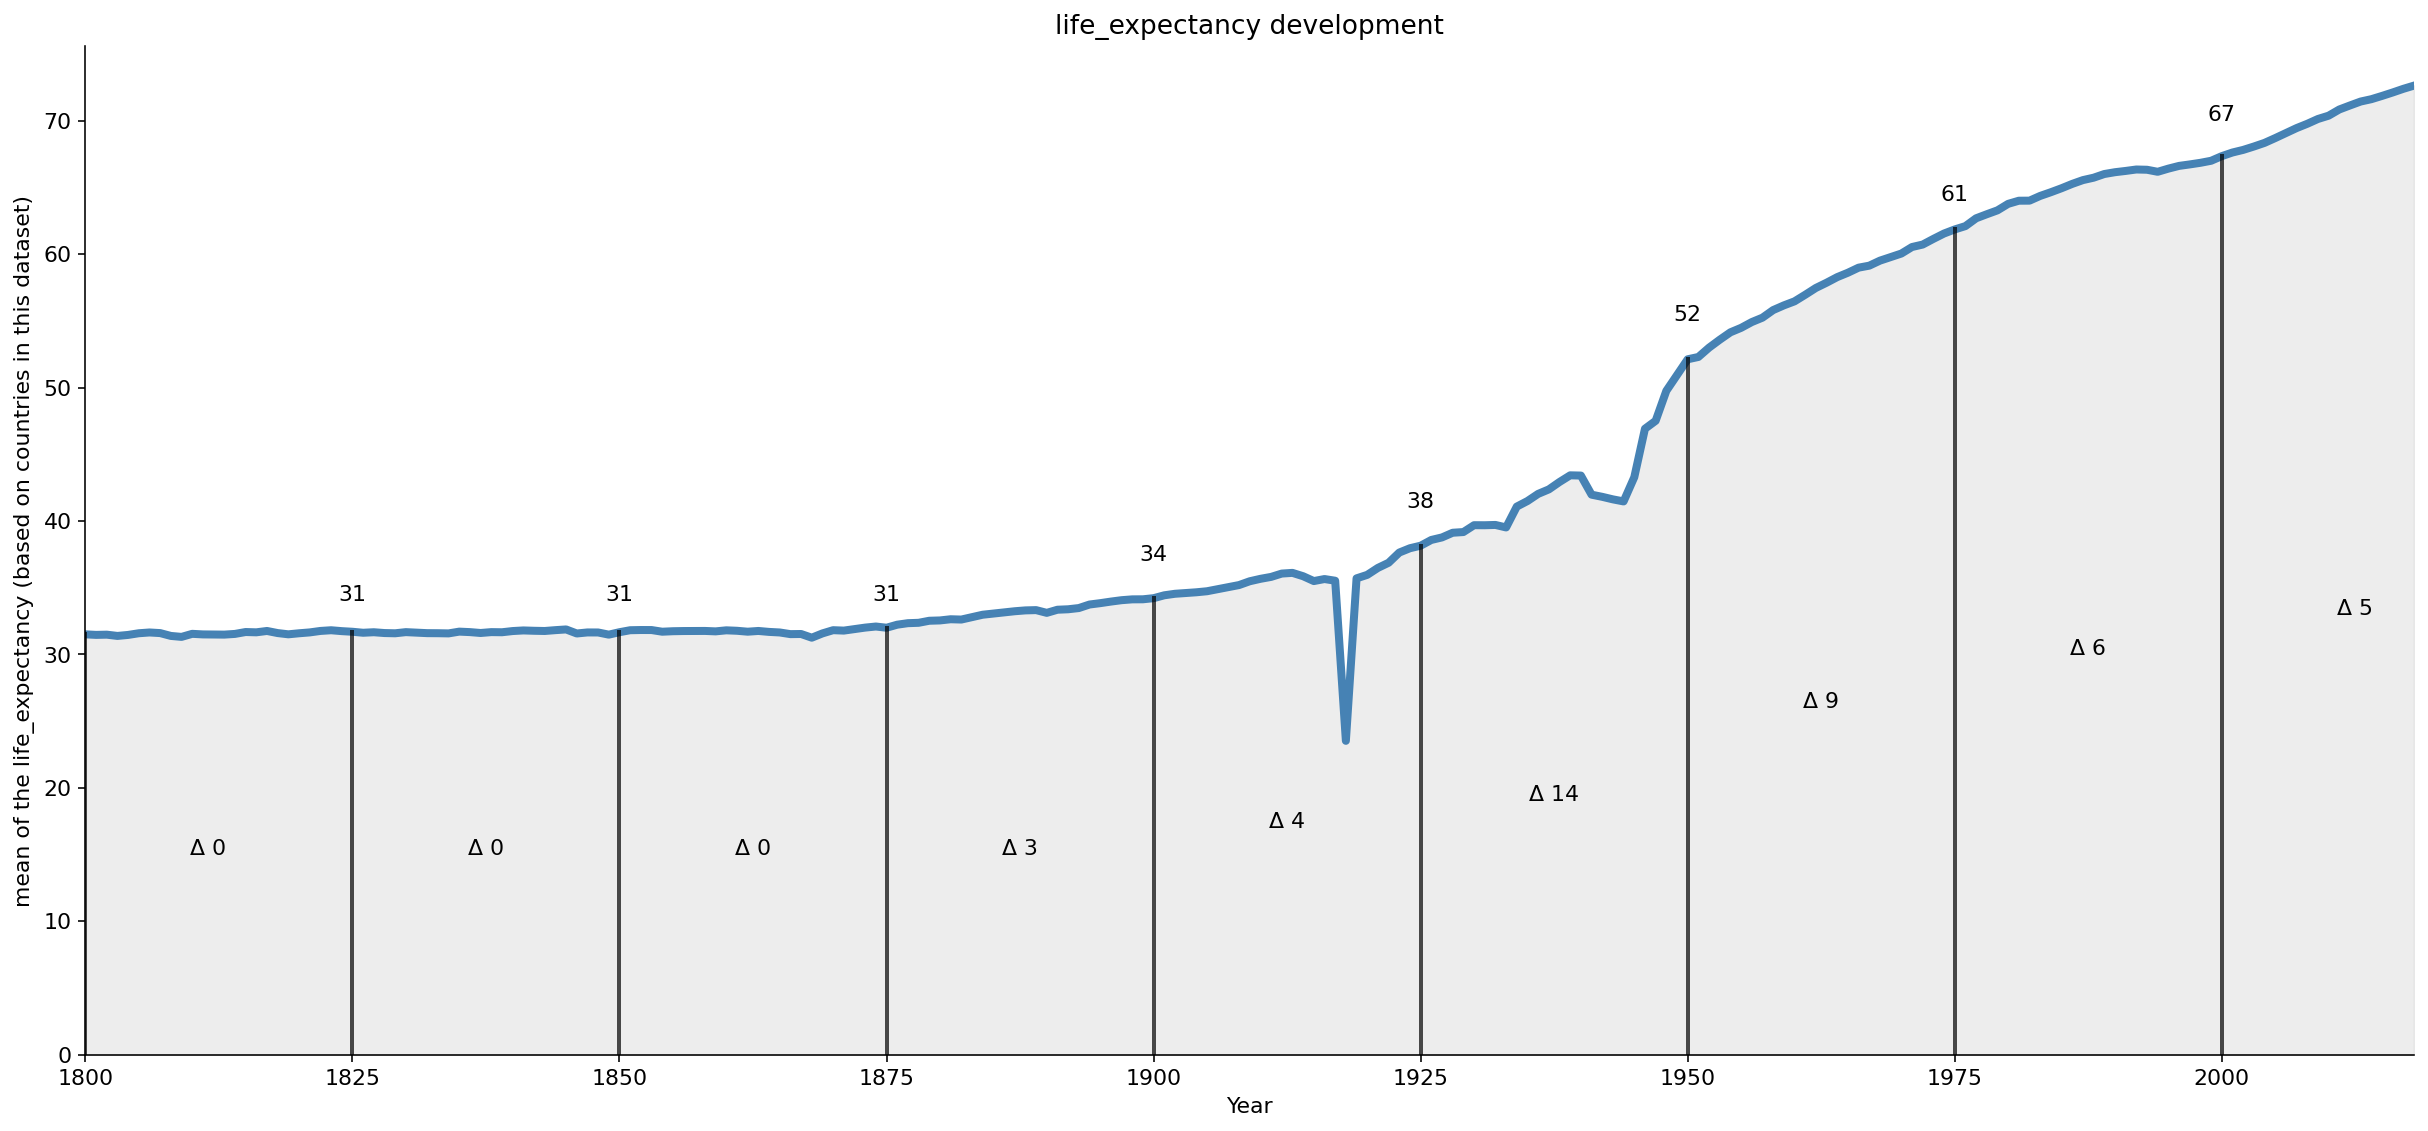

In [94]:
create_plot(df_income, "life_expectancy", func = "mean", integer = True, scale_y=3)

In [95]:
life_2018 = int(df_income.groupby("year", as_index = False).mean().query("year == 2018").life_expectancy)
life_1800 = int(df_income.groupby("year", as_index = False).mean().query("year == 1800").life_expectancy)

print("Life Expectancy 1800: ", life_1800)
print("Life Expectancy 2018: ", life_2018)
print("Increase: ", round(life_2018/life_1800 * 100, 2), "%")

print("Possible Delta for 2000 - 2025: ", round(5/18*25, 2))

Life Expectancy 1800:  31
Life Expectancy 2018:  72
Increase:  232.26 %
Possible Delta for 2000 - 2025:  6.94


>The graph shows a stagnation in average life expectancy from 1800 to 1875, followed by a 2-year increase from 1875 to 1900. Between 1900 and 1925, there is a significant reduction, which was most likely caused by the First World War, which lasted from 1914 to 1918. Between 1900 and 1925, the average life expectancy increased by three years. Between 1925 and 1950, there is another decline, which was most likely caused by a conflict, this time World War II. The greatest rise in life expectancy in this data may be found between 1950 and 1975, with an increase of 11 years. After that, life expectancy continued to rise, but at a slower pace.

>Overall, there is still an upward trend, with life expectancy increasing by 232.26 percent from 1800 to 2018. If we suppose that all of the elements that influence the actual evolution of life expectancy remain constant, the average life expectancy might increase by 1.94 years by 2025. To summarize, the average life expectancy is growing over the world as a result of advances in technology, science, and other things.

### Question 3: Is there a relationship between income and life expectancy?

> We will now examine the relationship between life expectancy and per capita income. A new dataframe will be constructed in order to do so.

In [96]:
df_income_scatter_2018 = df_income[df_income.year == 2018].copy()

In [97]:
df_income_scatter_2018.head()

,country,year,population,life_expectancy,income_per_person,bins
218,Afghanistan,2018,37200000,62.7,1530,2001 - 2018
437,Albania,2018,2880000,78.4,7790,2001 - 2018
656,Algeria,2018,42200000,76.0,7270,2001 - 2018
875,Angola,2018,30800000,64.6,6930,2001 - 2018
1094,Antigua and Barbuda,2018,96300,76.2,16500,2001 - 2018


> A scatter plot will be used to visualize the data. This dataset contains a large number of countries, and without an interactive display, it would be difficult to tell which ones we are looking at. However, it would be beneficial if we could split at least the continents in order to gain some insight into the overall trend and possibly some more specific observations. The pycountry library will be used for this. We will use this library to convert the country name to the country's alpha 2 code, and then to translate that alpha 2 code to the continent code.

In [98]:
#get the alpha_2 code of "Germany"
pycountry.countries.lookup("Germany").alpha_2

'DE'

In [99]:
#get the continent cide to the alpha_2 code
pycountry_convert.convert_country_alpha2_to_continent_code.COUNTRY_ALPHA2_TO_CONTINENT_CODE[
    pycountry.countries.lookup("Germany").alpha_2]

'EU'

In [100]:
df_income_scatter_2018.head()

,country,year,population,life_expectancy,income_per_person,bins
218,Afghanistan,2018,37200000,62.7,1530,2001 - 2018
437,Albania,2018,2880000,78.4,7790,2001 - 2018
656,Algeria,2018,42200000,76.0,7270,2001 - 2018
875,Angola,2018,30800000,64.6,6930,2001 - 2018
1094,Antigua and Barbuda,2018,96300,76.2,16500,2001 - 2018


> The following function does this process and will be applied to the "country" column.

In [101]:
def map_continent(column):
    """
    returns the continent or error to the given country
    """
    try:
        continent = pycountry_convert.convert_country_alpha2_to_continent_code.COUNTRY_ALPHA2_TO_CONTINENT_CODE[
        pycountry.countries.lookup(column).alpha_2]
    except: 
        continent = "Error"
        
    return continent

In [102]:
#use the defined function
df_income_scatter_2018["continent"] = df_income_scatter_2018["country"].apply(map_continent)

In [103]:
df_income_scatter_2018.head()

,country,year,population,life_expectancy,income_per_person,bins,continent
218,Afghanistan,2018,37200000,62.7,1530,2001 - 2018,AS
437,Albania,2018,2880000,78.4,7790,2001 - 2018,EU
656,Algeria,2018,42200000,76.0,7270,2001 - 2018,AF
875,Angola,2018,30800000,64.6,6930,2001 - 2018,AF
1094,Antigua and Barbuda,2018,96300,76.2,16500,2001 - 2018,NA


> Great, it looks liked it worked out fine. Let's check if there were some errors during this process.

In [104]:
#show missing countries
df_income_scatter_2018[df_income_scatter_2018.continent == "Error"]

,country,year,population,life_expectancy,income_per_person,bins,continent
5255,Brunei,2018,429000,74.2,56200,2001 - 2018,Error
6788,Cape Verde,2018,544000,73.5,4730,2001 - 2018,Error
8321,"Congo, Dem. Rep.",2018,84100000,64.7,492,2001 - 2018,Error
8540,"Congo, Rep.",2018,5240000,65.0,5740,2001 - 2018,Error
8978,Cote d'Ivoire,2018,25100000,63.6,1950,2001 - 2018,Error
15986,"Hong Kong, China",2018,7370000,84.3,53300,2001 - 2018,Error
17081,Iran,2018,81800000,77.6,12400,2001 - 2018,Error
23651,"Micronesia, Fed. Sts.",2018,113000,64.1,6000,2001 - 2018,Error
27812,Palestine,2018,4860000,74.7,0,2001 - 2018,Error
30002,Russia,2018,146000000,73.0,19500,2001 - 2018,Error


> There are not too much countries missing, so we can quickly create an manual map for the missing countries.

In [105]:
#create map for the missing countries
map_error_continent = {
    "Brunei": "AS",
    "Cape Verde": "AF",
    "Congo, Dem. Rep.": "AF",
    "Congo, Rep.": "AF",
    "Cote d'Ivoire": "AF",
    "Hong Kong, China": "AS",
    "Iran": "AS",
    "Macedonia, FYR": "EU",
    "Micronesia, Fed. Sts.": "OC",
    "Palestine": "AS",
    "Russia": "EU",
    "South Korea": "AS",
    "St. Lucia": "NA",
    "St. Vincent and the Grenadines": "NA",
    "Syria": "AS",
    "Timor-Leste": "AS"}

In [106]:
#add the missing countries manually
for x in list(map_error_continent.keys()):
    print(x)
    df_income_scatter_2018.loc[df_income_scatter_2018[df_income_scatter_2018.country == x].index, "continent"] = map_error_continent[x]

Brunei
Cape Verde
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Hong Kong, China
Iran
Macedonia, FYR
Micronesia, Fed. Sts.
Palestine
Russia
South Korea
St. Lucia
St. Vincent and the Grenadines
Syria
Timor-Leste


In [107]:
df_income_scatter_2018[df_income_scatter_2018.continent == "Error"]

,country,year,population,life_expectancy,income_per_person,bins,continent


> At this point, all of the countries have been mapped to their respective continents. We'll now generate a color map and apply it to the dataframe to differentiate them in the visualization.

In [108]:
df_income_scatter_2018.continent.unique()

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

In [109]:
#create a color map for the scatter plot
color_map = {
    "AS": '#f4a742', #orange
    "EU": '#20d82f', #green
    "AF": '#20d8d8', #light 'blue
    "NA": '#f2ff00', #yellow
    "SA": '#013384', #darker blue
    "OC": '#d64242'  #red
}

In [110]:
#add the colors to the continents
df_income_scatter_2018["color"] = df_income_scatter_2018.continent.apply(lambda x: color_map[x])

In [111]:
df_income_scatter_2018.head()

,country,year,population,life_expectancy,income_per_person,bins,continent,color
218,Afghanistan,2018,37200000,62.7,1530,2001 - 2018,AS,#f4a742
437,Albania,2018,2880000,78.4,7790,2001 - 2018,EU,#20d82f
656,Algeria,2018,42200000,76.0,7270,2001 - 2018,AF,#20d8d8
875,Angola,2018,30800000,64.6,6930,2001 - 2018,AF,#20d8d8
1094,Antigua and Barbuda,2018,96300,76.2,16500,2001 - 2018,NA,#f2ff00


The plot will now be created. The y-axis depicts life expectancy, whereas the x-axis depicts per capita income. The population will be represented by the size of the circles. For a cleaner site, the population will be reduced by 100000.

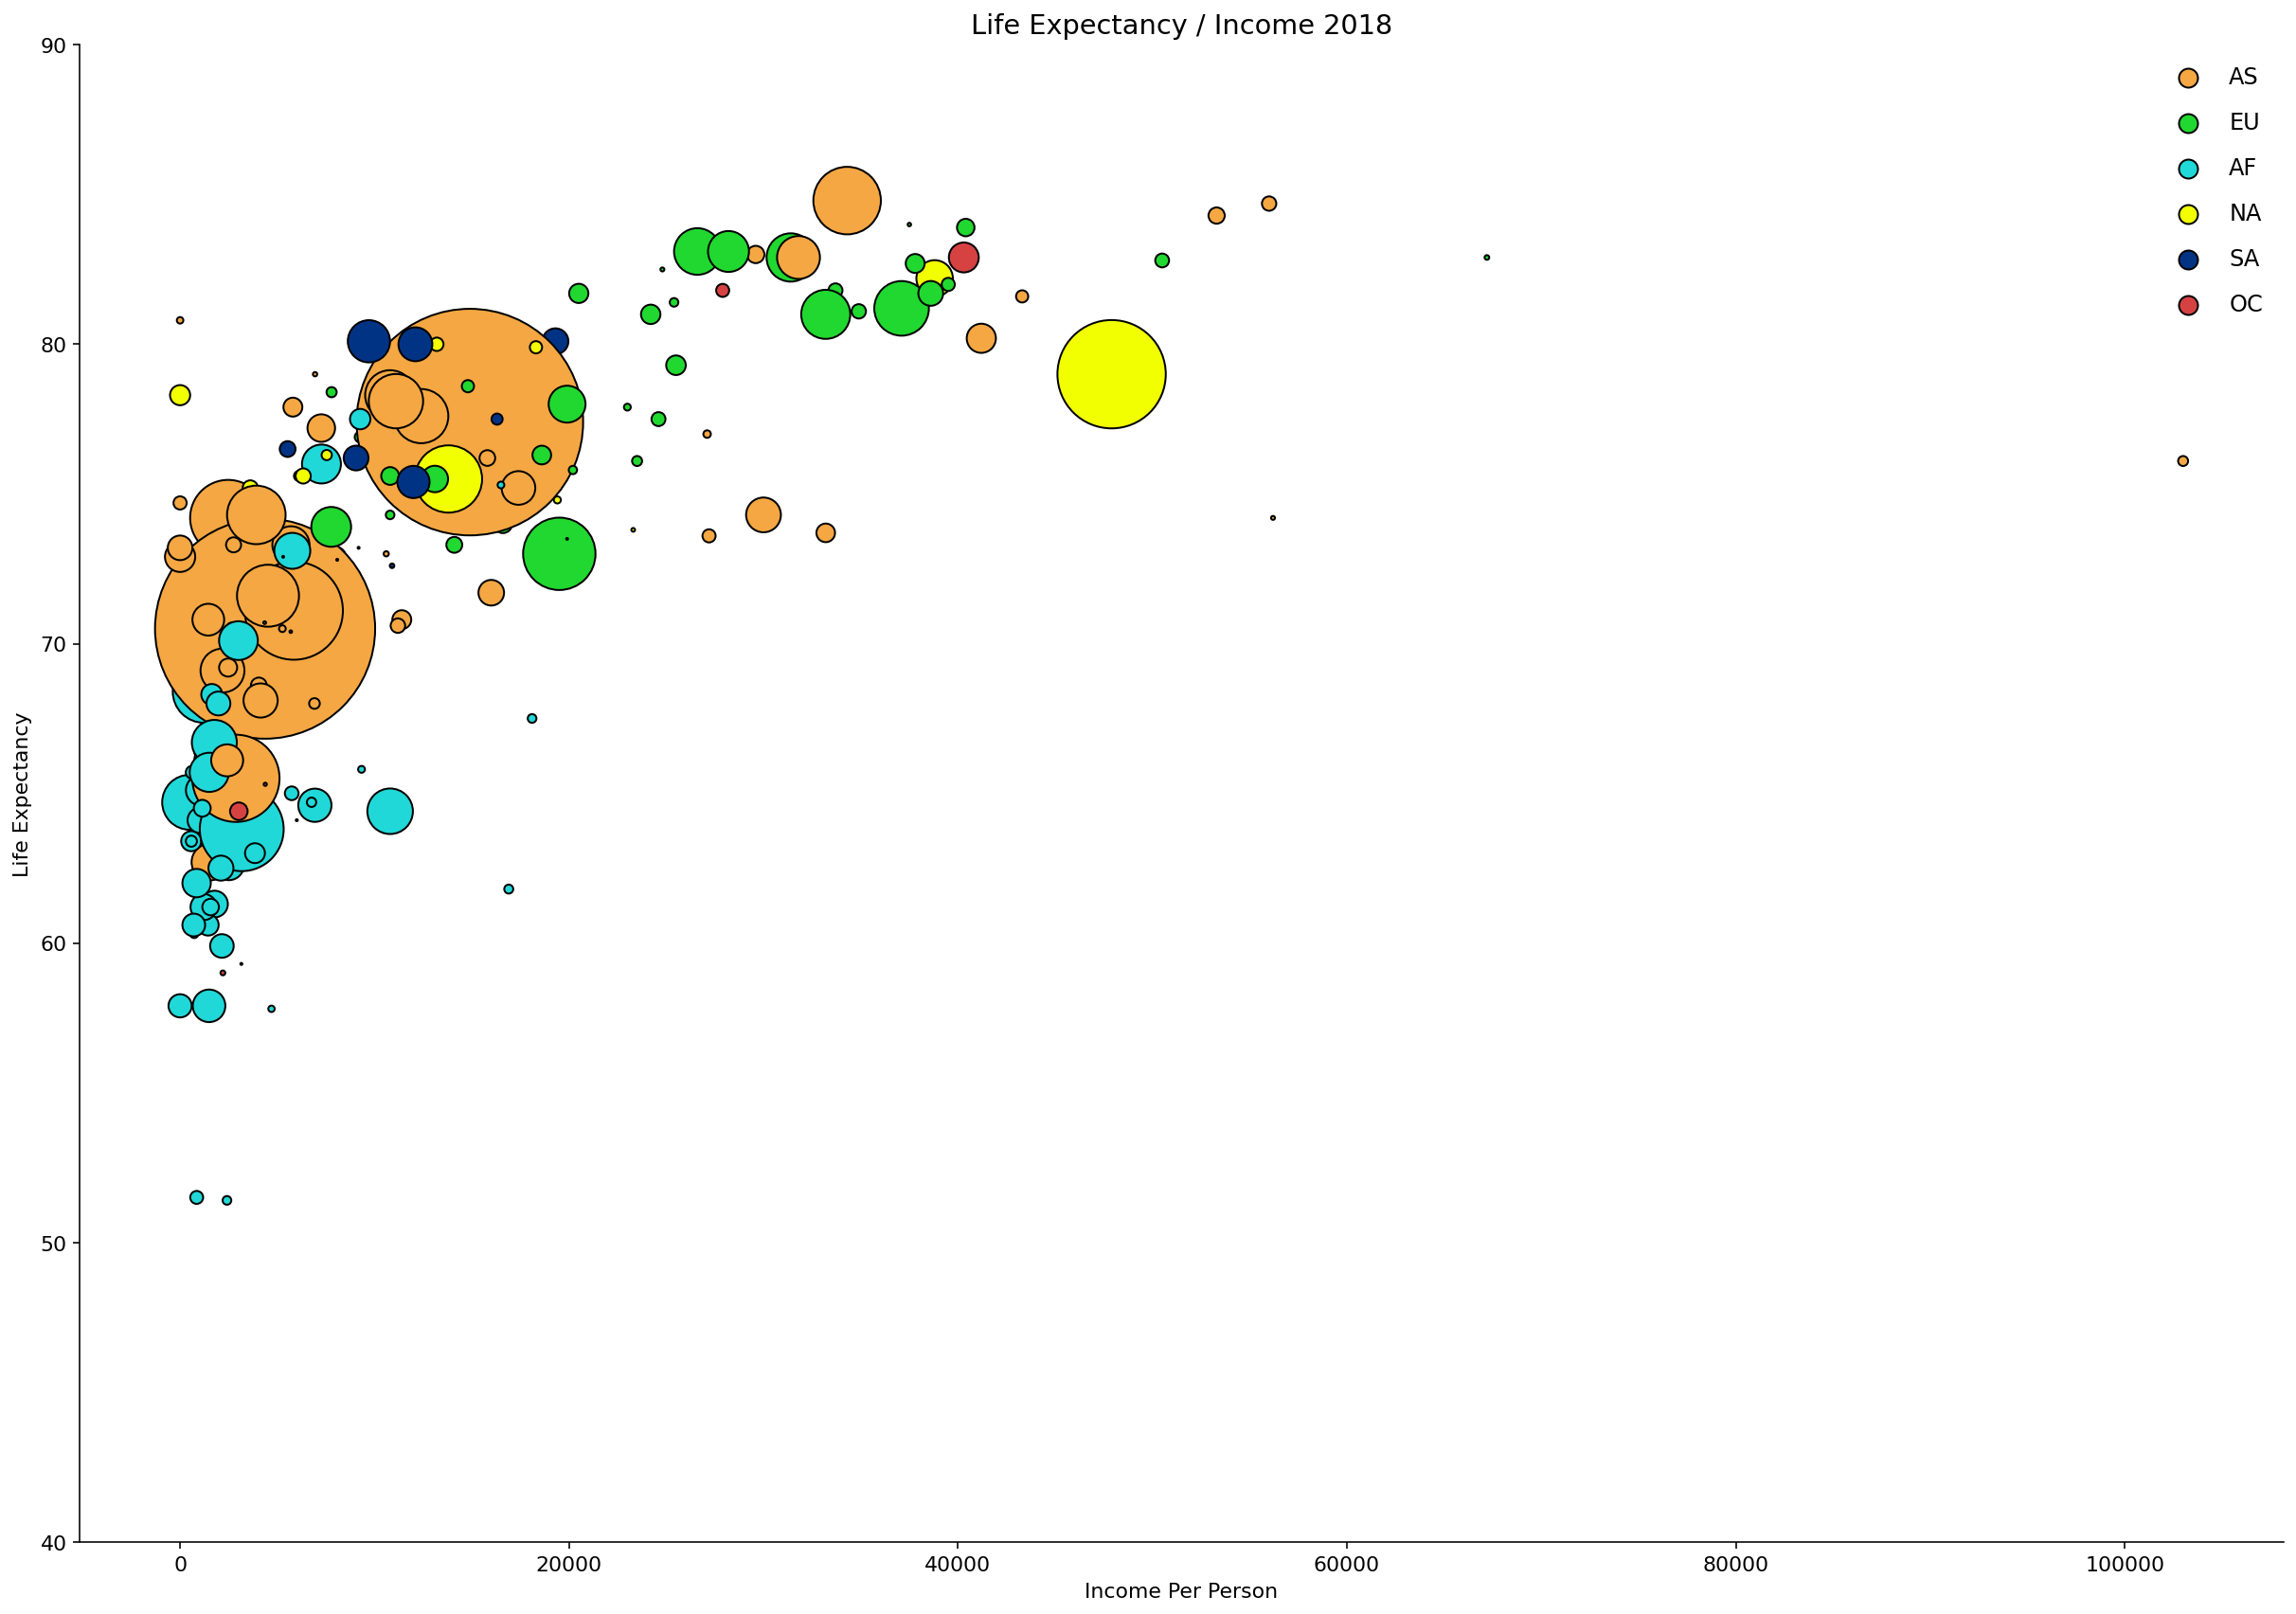

In [112]:
#create the scatter plot
fig, ax = plt.subplots(figsize = (17,12))
    
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rcParams.update({'font.size': 12})

x = df_income_scatter_2018["income_per_person"]
y = df_income_scatter_2018["life_expectancy"]
color = np.array(df_income_scatter_2018["color"])
size = df_income_scatter_2018["population"]

#plot the scatterpoints, the size is reduced by a factor for a cleaner plot
plt.scatter(x = x, y = y, s=size/100000, c = color, edgecolors = "black", label = None)

#set the y label of the plot
ax.set_ylabel(f"Life Expectancy")
#set the x label of the plot
ax.set_xlabel("Income Per Person")
#set the title of the plot
ax.set_title(f"Life Expectancy / Income 2018")
#disable the right and top spine for better look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_xlim(0,50000)
ax.set_ylim(40,90)

#https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

for continent in list(df_income_scatter_2018.continent.unique()):
    plt.scatter([], [], c=color_map[continent], alpha=1, label=str(continent), s = 100, edgecolors = "black")
    
legend1 = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='')

#tighten the plot layout
plt.tight_layout()

#show the plot (basically not necessary for jupyter but I always put it at the end)
plt.show()

> While life expectancy increases rapidly with increased income per person at first, it gradually decreases as income per person rises. We'll set the x-axis limit at 65000 income per person because there appear to be some outliers after 65,000. Prior to that, we can observe that as per capita income rises, the lower life expectancies in this data continue to decline. Because different people have varied life expectancies on virtually the same income, we can already assume that income is not the sole factor influencing life expectancy, but we can also assume that these two factors have a solid relationship.

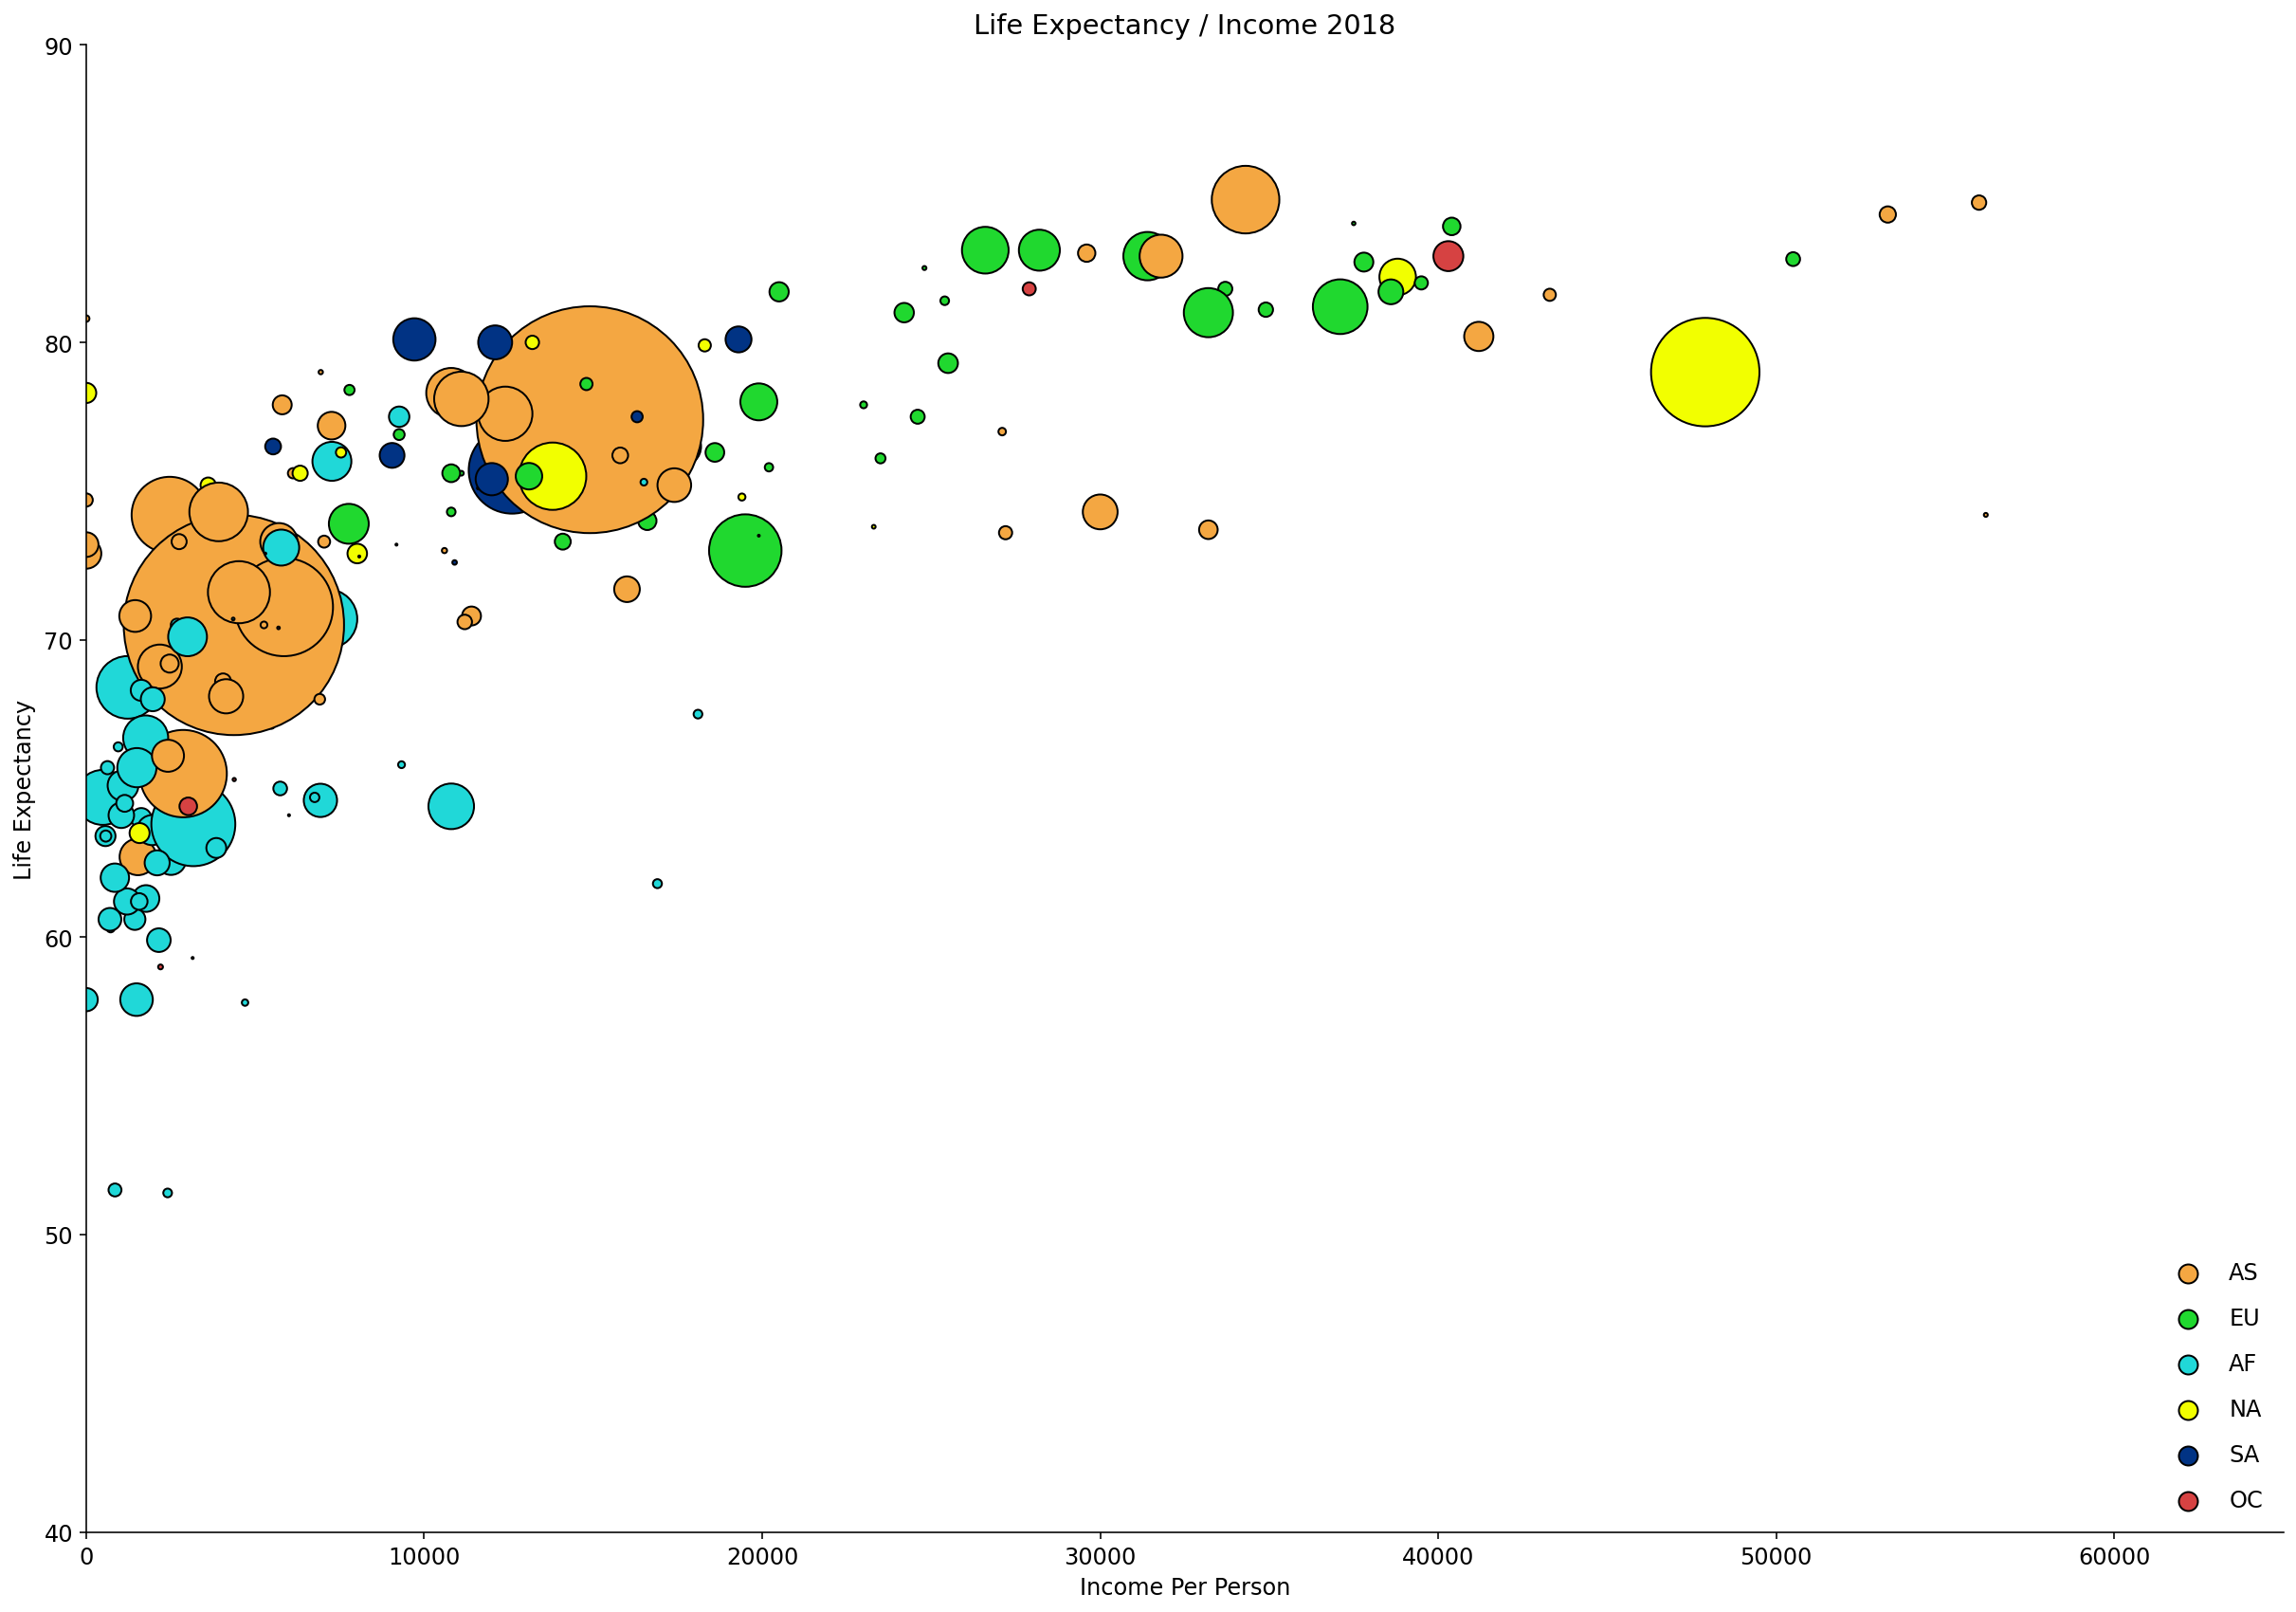

In [113]:
fig, ax = plt.subplots(figsize = (17,12))
    
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rcParams.update({'font.size': 12})

x = df_income_scatter_2018["income_per_person"]
y = df_income_scatter_2018["life_expectancy"]
color = np.array(df_income_scatter_2018["color"])
size = df_income_scatter_2018["population"]

plt.scatter(x = x, y = y, s=size/100000, c = color, edgecolors = "black", label = None)

#set the y label of the plot
ax.set_ylabel(f"Life Expectancy")
#set the x label of the plot
ax.set_xlabel("Income Per Person")
#set the title of the plot
ax.set_title(f"Life Expectancy / Income 2018")
#disable the right and top spine for better look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(0,65000)
ax.set_ylim(40,90)

#https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

for continent in list(df_income_scatter_2018.continent.unique()):
    plt.scatter([], [], c=color_map[continent], alpha=1, label=str(continent), s = 100, edgecolors = "black")
    
legend1 = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='', loc = 4)

#tighten the plot layout
plt.tight_layout()

#show the plot (basically not necessary for jupyter but I always put it at the end)
plt.show()

> The countries of Africa are largely visible on the lower left. We can see a cluster of Asian countries, intermingled with certain African countries, with rising per capita income and life expectancy. After a certain level of income per person, the countries are primarily European, with a few Asian countries thrown in for good measure, and a large yellow circle that most likely represents the United States.

In [114]:
df_income.corr()[["life_expectancy", "income_per_person"]]

,life_expectancy,income_per_person
year,0.804263,0.443321
population,0.123318,0.060753
life_expectancy,1.000000,0.614307
income_per_person,0.614307,1.000000


> The correlation calculation backs up our previous findings. The life expectancy and income per person is correlated with 0.6143, and while the two variables do not move in lockstep, there is still an observable relationship between them.

<a id='conclusions'></a>
## Conclusions and Summary

**Discussed questions so far:**
><ol>
>    <li><p>What happened to the world's population over time?</p></li>     
>    <li><p>How have life expectancy and per capita income evolved over time?</p></li>     
>    <li><p>Is there a relationship between income and life expectancy?</p></li> 
></ol>

**Limitations due to the cleaning process in the used datasets:**

><ol>
    ><li><p>For the analysis, following countries were dropped out of the dataframe due to too much missing data:</li>
    >Andorra, Dominica, Holy See, Liechtenstein, Marshall Islands, Monaco, Nauru, Palau, San Marino, St. Kitts and Nevis, Tuvalu
></ol>

**Summary and Conclusions**
><ol>
>    <li><p>I can see an overall and continuing upward trend in the world population, per capita income, and life expectancy.</p></li>     
>    <li><p>Between 1950 and 1975, in particular, there was a considerable growth in all three metrics.</p></li>     
>    <li><p>The global population is rapidly growing, with one apparent reason being an increase in general life expectancy.</p></li> 
><li><p>I also discovered that there is a clear association between per capita income and life expectancy. Although an increase in income does not ensure an increase in life expectancy, it is likely to happen to some extent.</p></li> 
></ol>

In [115]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295